## Import Packages

In [1]:
import os
import yaml
import math
import pandas as pd
import numpy as np
import scanpy as sc
import scipy.io
import humanfriendly

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, facecolor='white')

## Parameters

In [3]:
# this cell is tagged `parameters` and will be overridden by papermill
workflow_id = "c3a941bf-62ed-469e-8ee6-d7448cdee457"
sample_name = "1973_HD1915_7xNK_FB_HTO"
path_data = os.path.join("./hashtag/", sample_name, workflow_id)

## Run Report

In [4]:
!cat $path_data/report/run_report.yaml

Date: 2021-07-26
Running time: 5.0 minutes, 29.7 seconds
CITE-seq-Count Version: 1.4.3
Reads processed: 10711133
Percentage mapped: 95
Percentage unmapped: 5
Uncorrected cells: 1
Correction:
	Cell barcodes collapsing threshold: 1
	Cell barcodes corrected: 57585
	UMI collapsing threshold: 1
	UMIs corrected: 21000
Run parameters:
	Read1_filename: /tmp/scratch/dp-lab-gwf-core/cromwell-execution/Hashtag/e310f49b-44df-4ed0-a723-738a4ff06480/call-Preprocess/Preprocess/95c18bc7-7aca-4ba0-ab18-7cb3f2c8f0db/call-TrimR1/cacheCopy/R1.fastq.gz
	Read2_filename: /tmp/scratch/dp-lab-gwf-core/cromwell-execution/Hashtag/e310f49b-44df-4ed0-a723-738a4ff06480/call-Preprocess/Preprocess/95c18bc7-7aca-4ba0-ab18-7cb3f2c8f0db/call-TrimR2/cacheCopy/R2.fastq.gz
	Cell barcode:
		First position: 1
		Last position: 16
	UMI barcode:
		First position: 17
		Last position: 28
	Expected cells: 0
	Tags max errors: 2
	Start trim: 10


In [5]:
with open(os.path.join(path_data, "report/run_report.yaml"), "rt") as fin:
    # report file contains tabs
    # run_report = yaml.load(fin, Loader=yaml.FullLoader)        
    run_report = fin.read().replace("\t", "  ")
    run_report = yaml.load(run_report, Loader=yaml.FullLoader)

In [6]:
# num of reads processed
humanfriendly.format_number(run_report["Reads processed"])

'10,711,133'

In [7]:
# percentage mapped
run_report["Percentage mapped"]

95

## Load AnnData

In [8]:
adata = sc.read_h5ad(os.path.join(path_data, f"{sample_name}.h5ad"))

In [9]:
adata

AnnData object with n_obs × n_vars = 10957 × 7
    obs: 'unmapped', 'barcode_sequence', 'hash_id'
    var: 'feature_name'

In [10]:
adata.obs

unmapped  barcode_sequence  hash_id
227303201131438        27  CTGTGAACATCAGCGC  Doublet
191766864546027        16  GTACAACTCGCAATGT    A0252
227434332055453         7  CTGGACGCAAACTCTG    A0256
133921842280299        14  TCTACATTCGATTGGT    A0255
165239984667435        21  AGAAATGCAGGTGAGT    A0257
...                   ...               ...      ...
197281467784107        24  GACCCAGTCTGGGCGT    A0251
205861516597556        13  GCCTGTTCAATGAACA    A0251
196576840146219        30  GAGAAATAGCAGCAGT  Doublet
162072265964956        17  AACCTGATCGCTCCTA    A0257
122490813798755         9  TTCCTCTGTATGAGAT    A0251

[10957 rows x 3 columns]

In [11]:
adata.var

feature_name
A0251-GTCAACTCTTTAGCG      CD56brightA+C-
A0252-TGATGGCCTATTGGG      CD56brightA+C+
A0253-TTCCGCCTCTCTTTG         CD56dimA+C+
A0254-AGTAAGTTCAGCGTA         CD56dimA+C-
A0255-AAGTATCGTTTCGCA  CD56dimA-C+NKp30hi
A0256-GGTTGCCAGATGTCA   CD56dimA-C+NKp30-
A0257-TGTCTTTCCTGCCAG         CD56dimA-C-

In [12]:
adata.to_df()

A0251-GTCAACTCTTTAGCG  A0252-TGATGGCCTATTGGG  \
227303201131438                      0                    408   
191766864546027                      0                    533   
227434332055453                      0                      0   
133921842280299                      0                      0   
165239984667435                      1                      1   
...                                ...                    ...   
197281467784107                    423                      0   
205861516597556                    324                      4   
196576840146219                      0                    572   
162072265964956                      1                      1   
122490813798755                    259                      1   

                 A0253-TTCCGCCTCTCTTTG  A0254-AGTAAGTTCAGCGTA  \
227303201131438                    329                      9   
191766864546027                      1                      3   
227434332055453                      0                      1   
133921842280299                      1                      1   
165239984667435                      2                      3   
...                                ...                    ...   
197281467784107                      2                      5   
205861516597556                      2                      4   
196576840146219                      2                     50   
162072265964956                      0                      2   
122490813798755                      2                      2   

                 A0255-AAGTATCGTTTCGCA  A0256-GGTTGCCAGATGTCA  \
227303201131438                      2                      0   
191766864546027                      1                      1   
227434332055453                      0                    235   
133921842280299                    490                      0   
165239984667435                      0                      1   
...                                ...                    ...   
197281467784107                      0                      2   
205861516597556                      0                      0   
196576840146219                      2                      1   
162072265964956                      0                      1   
122490813798755                      2                      0   

                 A0257-TGTCTTTCCTGCCAG  
227303201131438                      1  
191766864546027                      0  
227434332055453                      1  
133921842280299                      0  
165239984667435                    607  
...                                ...  
197281467784107                      1  
205861516597556                      0  
196576840146219                      0  
162072265964956                    472  
122490813798755                      0  

[10957 rows x 7 columns]

## Load Read Counts

In [13]:
mtx = scipy.io.mmread(
    os.path.join(path_data, "reads/matrix.mtx.gz")
)

In [14]:
adata.layers["reads"] = mtx.T.tocsr()[:, :-1]

In [15]:
adata.obs["unmapped_reads"] = mtx.T.toarray()[:, -1]

In [16]:
adata.obs

unmapped  barcode_sequence  hash_id  unmapped_reads
227303201131438        27  CTGTGAACATCAGCGC  Doublet              36
191766864546027        16  GTACAACTCGCAATGT    A0252              21
227434332055453         7  CTGGACGCAAACTCTG    A0256               8
133921842280299        14  TCTACATTCGATTGGT    A0255              15
165239984667435        21  AGAAATGCAGGTGAGT    A0257              30
...                   ...               ...      ...             ...
197281467784107        24  GACCCAGTCTGGGCGT    A0251              28
205861516597556        13  GCCTGTTCAATGAACA    A0251              13
196576840146219        30  GAGAAATAGCAGCAGT  Doublet              37
162072265964956        17  AACCTGATCGCTCCTA    A0257              20
122490813798755         9  TTCCTCTGTATGAGAT    A0251              11

[10957 rows x 4 columns]

## Classification

In [17]:
adata.obs

unmapped  barcode_sequence  hash_id  unmapped_reads
227303201131438        27  CTGTGAACATCAGCGC  Doublet              36
191766864546027        16  GTACAACTCGCAATGT    A0252              21
227434332055453         7  CTGGACGCAAACTCTG    A0256               8
133921842280299        14  TCTACATTCGATTGGT    A0255              15
165239984667435        21  AGAAATGCAGGTGAGT    A0257              30
...                   ...               ...      ...             ...
197281467784107        24  GACCCAGTCTGGGCGT    A0251              28
205861516597556        13  GCCTGTTCAATGAACA    A0251              13
196576840146219        30  GAGAAATAGCAGCAGT  Doublet              37
162072265964956        17  AACCTGATCGCTCCTA    A0257              20
122490813798755         9  TTCCTCTGTATGAGAT    A0251              11

[10957 rows x 4 columns]

In [18]:
adata.obs.groupby("hash_id").size()

hash_id
A0251      1638
A0252      1135
A0253      2742
A0254      1007
A0255      1244
A0256      1295
A0257       874
Doublet    1022
dtype: int64

### Results

In [19]:
df_stats = adata.obs.groupby("hash_id").size()
df_stats

hash_id
A0251      1638
A0252      1135
A0253      2742
A0254      1007
A0255      1244
A0256      1295
A0257       874
Doublet    1022
dtype: int64

In [20]:
df_stats.sum()

10957

In [21]:
# sum excluding doublets
df_stats[ df_stats.index != "Doublet" ].sum()

9935

### Pie Chart

In [22]:
labels = [label.upper() if label != "Doublet" else "Doublet/Negative" for label in df_stats.index]
labels

['A0251',
 'A0252',
 'A0253',
 'A0254',
 'A0255',
 'A0256',
 'A0257',
 'Doublet/Negative']

#### Pie 1

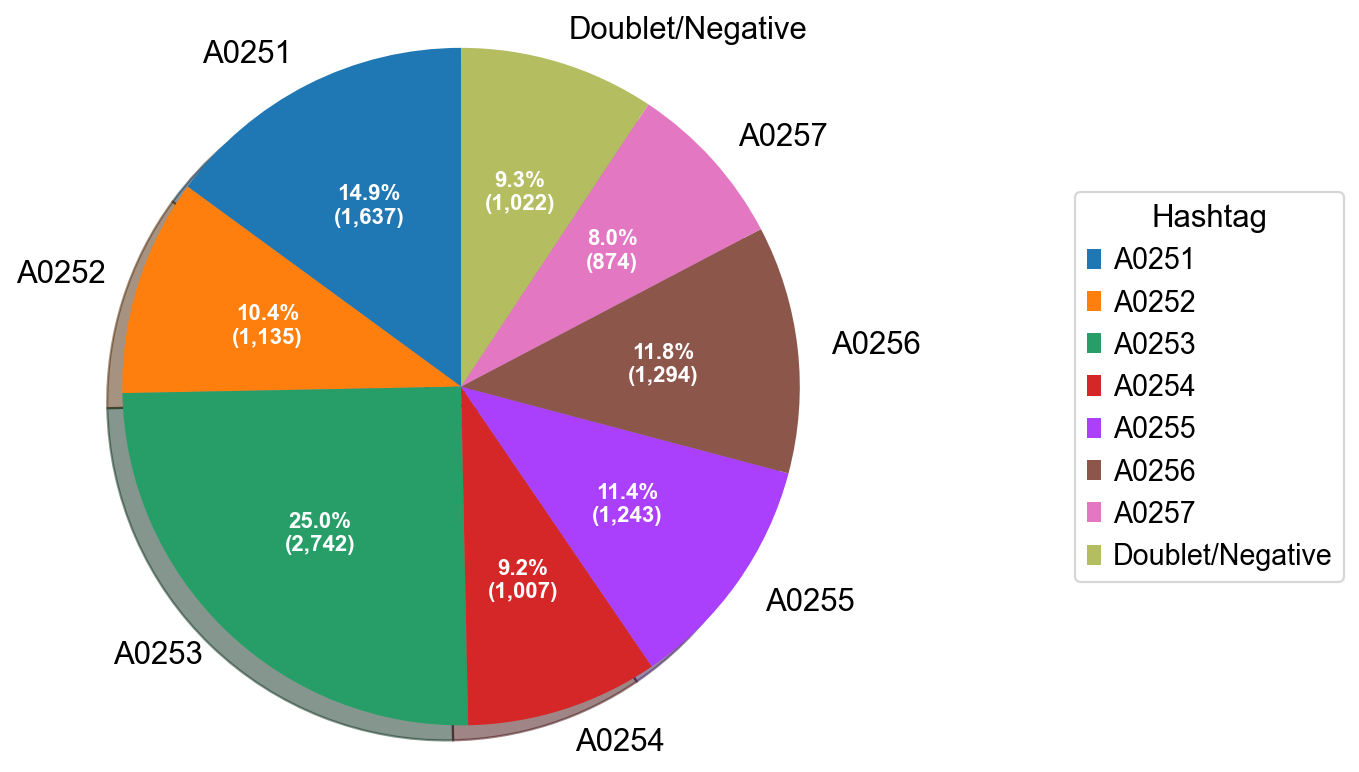

In [23]:
fig = plt.figure(figsize=(6,6), facecolor="white")
ax = fig.add_subplot(111)

def func_autopct(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:,d})".format(pct, absolute)

wedges, _, autotexts = ax.pie(
    df_stats,
    labels=labels,
    autopct=lambda pct: func_autopct(pct, df_stats),    
    shadow=True, startangle=90
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

ax.axis('equal')
ax.legend(
    wedges,
    labels,
    title="Hashtag",
    loc="center left",
    bbox_to_anchor=(1.3, 0.0, 0.5, 1)
)

plt.show()

#### Pie 2

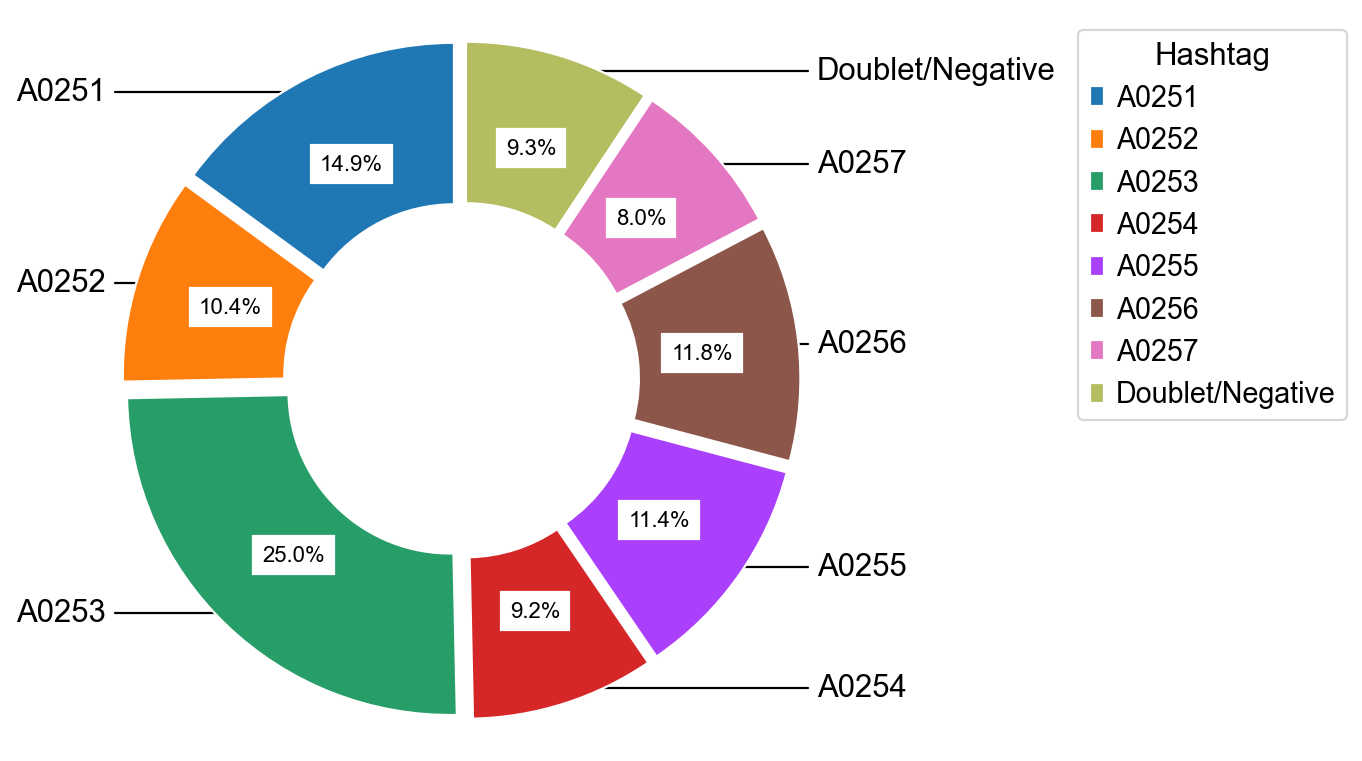

In [24]:
fig = plt.figure(figsize=(6,6), facecolor="white")
ax = fig.add_subplot(111)

def func_autopct(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:,d})".format(pct, absolute)

cmap = plt.get_cmap("tab20c")

wedges, _, autotexts = ax.pie(
    df_stats,
    explode=[0.05] * len(df_stats),
    wedgeprops=dict(width=0.5, edgecolor='w'),
    autopct='%1.1f%%',
    pctdistance=0.7,
    shadow=False,
    startangle=90,
    rotatelabels=True
)

kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(
        labels[i], xy=(x, y), xytext=(1.1 * np.sign(x), y),
        horizontalalignment=horizontalalignment, **kw
    )

for i, autotext in enumerate(autotexts):
    autotext.set_color('black')
    autotext.set_fontsize(10)
    autotext.set_rotation(0)
    autotext.set_backgroundcolor("white")
    
ax.axis('equal')
ax.legend(
    wedges,
    labels,
    title="Hashtag",
    bbox_to_anchor=(1.2, 0.0, 0.5, 1)
)

plt.show()

### Distribution

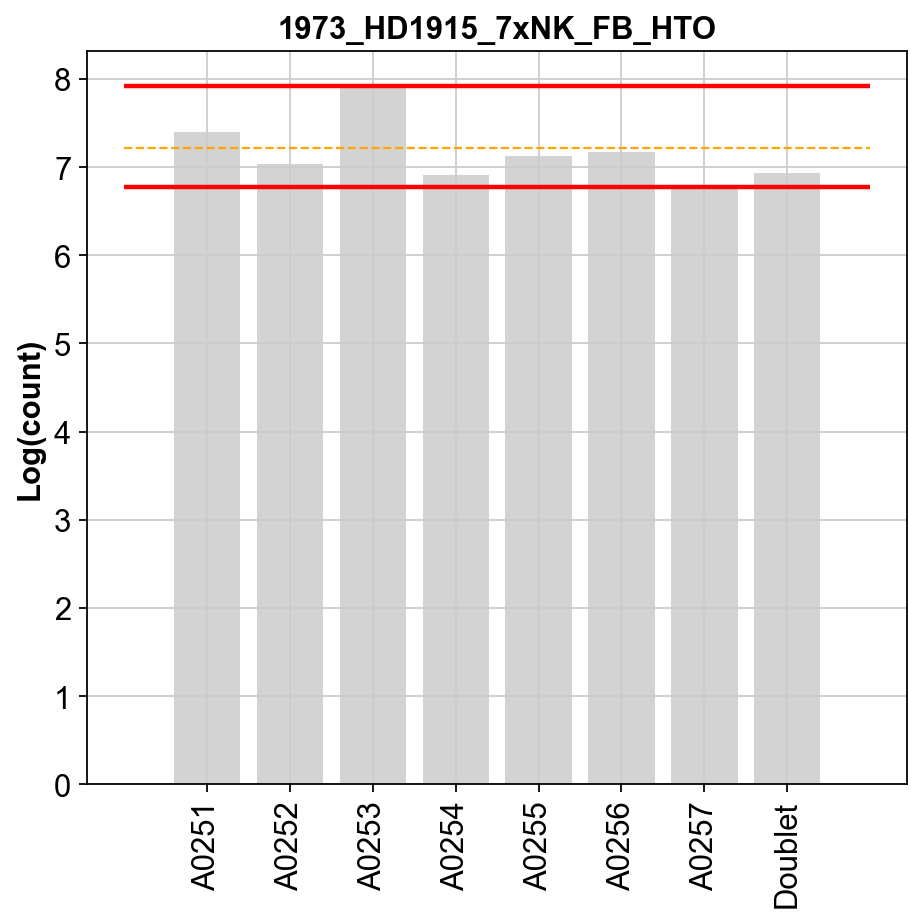

In [25]:
fig = plt.figure(figsize=(6,6), facecolor="white")
ax = fig.add_subplot(111)

ax.bar(df_stats.index, np.log(list(df_stats.values)), color="lightgray")
    
ax.set_ylabel("Log(count)", fontweight="bold")
ax.set_title(sample_name, fontsize=14, fontweight="heavy")
ax.tick_params(axis="x", rotation=90)
    
if len(df_stats) != 0:
    num_hashtags = len(df_stats.values)
    ax.hlines(y=np.log(max(df_stats.values)), xmin=-1, xmax=num_hashtags, colors='red', linestyles='-', lw=2)
    ax.hlines(y=np.log(min(df_stats.values)), xmin=-1, xmax=num_hashtags, colors='red', linestyles='-', lw=2)    
    ax.hlines(y=np.log(np.mean(list(df_stats.values))), xmin=-1, xmax=num_hashtags, colors='orange', linestyles='--', lw=1)    

plt.tight_layout()

plt.show()

## Read Counts

In [26]:
adata.to_df(layer="reads")

A0251-GTCAACTCTTTAGCG  A0252-TGATGGCCTATTGGG  \
227303201131438                      0                    499   
191766864546027                      0                    642   
227434332055453                      0                      0   
133921842280299                      0                      0   
165239984667435                      1                      1   
...                                ...                    ...   
197281467784107                    525                      0   
205861516597556                    374                      5   
196576840146219                      0                    705   
162072265964956                      1                      1   
122490813798755                    307                      2   

                 A0253-TTCCGCCTCTCTTTG  A0254-AGTAAGTTCAGCGTA  \
227303201131438                    407                     11   
191766864546027                      1                      3   
227434332055453                      0                      1   
133921842280299                      2                      1   
165239984667435                      2                      3   
...                                ...                    ...   
197281467784107                      3                      6   
205861516597556                      2                      4   
196576840146219                      2                     63   
162072265964956                      0                      2   
122490813798755                      2                      2   

                 A0255-AAGTATCGTTTCGCA  A0256-GGTTGCCAGATGTCA  \
227303201131438                      3                      0   
191766864546027                      1                      1   
227434332055453                      0                    290   
133921842280299                    592                      0   
165239984667435                      0                      3   
...                                ...                    ...   
197281467784107                      0                      2   
205861516597556                      0                      0   
196576840146219                      2                      1   
162072265964956                      0                      1   
122490813798755                      2                      0   

                 A0257-TGTCTTTCCTGCCAG  
227303201131438                      1  
191766864546027                      0  
227434332055453                      2  
133921842280299                      0  
165239984667435                    710  
...                                ...  
197281467784107                      1  
205861516597556                      0  
196576840146219                      0  
162072265964956                    587  
122490813798755                      0  

[10957 rows x 7 columns]

### Matrix vs. Run Report

Note that unmapped reads are excluded.

In [27]:
adata.layers["reads"].sum()

8234964

In [28]:
adata.layers["reads"].sum(), run_report["Reads processed"]

(8234964, 10711133)

In [29]:
adata.layers["reads"].sum() / run_report["Reads processed"] * 100

76.88228686918555

### Total Reads per Hashtag

In [30]:
adata.var["total_reads"] = adata.layers["reads"].sum(axis=0).A1

In [31]:
adata.var["total_reads"]

A0251-GTCAACTCTTTAGCG     846398
A0252-TGATGGCCTATTGGG     880547
A0253-TTCCGCCTCTCTTTG    1677480
A0254-AGTAAGTTCAGCGTA    1246014
A0255-AAGTATCGTTTCGCA    1199948
A0256-GGTTGCCAGATGTCA    1534074
A0257-TGTCTTTCCTGCCAG     850503
Name: total_reads, dtype: int64

### Total Reads per Celluar Barcode

In [32]:
adata.obs["total_reads"] = adata.layers["reads"].sum(axis=1).A1

In [33]:
adata.obs["total_reads"]

227303201131438    921
191766864546027    648
227434332055453    293
133921842280299    595
165239984667435    720
                  ... 
197281467784107    537
205861516597556    385
196576840146219    773
162072265964956    592
122490813798755    315
Name: total_reads, Length: 10957, dtype: int64

### Zero Rows

In [34]:
np.count_nonzero(adata.obs["total_reads"] == 0)

9

In [35]:
np.count_nonzero(adata.obs["total_reads"] == 0) / adata.shape[0]

0.0008213927169845761

### First Hashtag

In [36]:
# remove "Doublet" and pick the first hashtag
hashtags = sorted(list(set(adata.obs["hash_id"].unique()) - set(["Doublet"])))
first_hashtag = hashtags[0] if len(hashtags) > 0 else None
first_hashtag

'A0251'

In [37]:
adata.to_df(layer="reads")[adata.obs["hash_id"] == first_hashtag].sort_values(adata.var.index[0], ascending=False)

A0251-GTCAACTCTTTAGCG  A0252-TGATGGCCTATTGGG  \
236176853592492                   1977                      3   
235550861908379                   1748                      5   
160361944378787                   1449                      2   
135504967154595                   1384                      5   
236176853068198                   1278                      2   
...                                ...                    ...   
191706615102835                     65                      1   
126347801152436                     63                      0   
191646632368931                     49                      0   
204908283221805                     19                      0   
231282308437941                     18                      0   

                 A0253-TTCCGCCTCTCTTTG  A0254-AGTAAGTTCAGCGTA  \
236176853592492                      5                      1   
235550861908379                      5                     11   
160361944378787                      1                      6   
135504967154595                      2                     36   
236176853068198                      3                      8   
...                                ...                    ...   
191706615102835                      0                      7   
126347801152436                      0                      0   
191646632368931                      0                      0   
204908283221805                      1                      3   
231282308437941                      0                      2   

                 A0255-AAGTATCGTTTCGCA  A0256-GGTTGCCAGATGTCA  \
236176853592492                      0                      0   
235550861908379                      3                      0   
160361944378787                      1                      2   
135504967154595                      1                      0   
236176853068198                      0                      3   
...                                ...                    ...   
191706615102835                      0                      0   
126347801152436                      0                      0   
191646632368931                      1                      0   
204908283221805                      0                      0   
231282308437941                      0                      1   

                 A0257-TGTCTTTCCTGCCAG  
236176853592492                      2  
235550861908379                      1  
160361944378787                      0  
135504967154595                      1  
236176853068198                      2  
...                                ...  
191706615102835                      0  
126347801152436                      0  
191646632368931                      0  
204908283221805                      0  
231282308437941                      0  

[1638 rows x 7 columns]

### Overall Stats

In [38]:
adata.to_df(layer="reads").sum(axis=1).describe()

count    10957.000000
mean       751.571050
std        630.473517
min          0.000000
25%        452.000000
50%        646.000000
75%        913.000000
max      22809.000000
dtype: float64

### 95 Percentile

In [39]:
percentile_95 = adata.obs["total_reads"].describe(percentiles=[0.95])["95%"]
percentile_95

1510.199999999999

In [40]:
adata.to_df(layer="reads")[ adata.obs["total_reads"] > percentile_95 ]

A0251-GTCAACTCTTTAGCG  A0252-TGATGGCCTATTGGG  \
126150233472412                      3                      0   
196046410958707                      0                      3   
241097665080116                      1                      0   
235067397257646                    504                      0   
231754888570724                      2                      2   
...                                ...                    ...   
157623887514540                      1                      6   
227915503192350                      3                      3   
135632493075700                      0                      7   
236718690879774                      1                      2   
200992213059357                      1                      2   

                 A0253-TTCCGCCTCTCTTTG  A0254-AGTAAGTTCAGCGTA  \
126150233472412                      2                   1623   
196046410958707                      1                   1772   
241097665080116                      2                     11   
235067397257646                    507                    877   
231754888570724                   1606                      3   
...                                ...                    ...   
157623887514540                      1                      2   
227915503192350                      2                      4   
135632493075700                      6                      2   
236718690879774                    539                      0   
200992213059357                      1                      4   

                 A0255-AAGTATCGTTTCGCA  A0256-GGTTGCCAGATGTCA  \
126150233472412                      6                   1100   
196046410958707                      3                      0   
241097665080116                      1                   1913   
235067397257646                      2                      0   
231754888570724                      0                      0   
...                                ...                    ...   
157623887514540                      7                   2095   
227915503192350                      5                   1716   
135632493075700                   1714                      0   
236718690879774                      3                   1325   
200992213059357                   1502                      1   

                 A0257-TGTCTTTCCTGCCAG  
126150233472412                      9  
196046410958707                      0  
241097665080116                     12  
235067397257646                      0  
231754888570724                      0  
...                                ...  
157623887514540                     13  
227915503192350                     11  
135632493075700                      0  
236718690879774                      6  
200992213059357                      0  

[548 rows x 7 columns]

In [41]:
adata.to_df(layer="reads")[ adata.obs["total_reads"] > percentile_95 ].sample(5, random_state=0)

A0251-GTCAACTCTTTAGCG  A0252-TGATGGCCTATTGGG  \
204359588830124                      0                      1   
129593856940469                      0                      3   
126767500048245                      2                      0   
191141961426716                      0                    594   
135081900300715                    384                      0   

                 A0253-TTCCGCCTCTCTTTG  A0254-AGTAAGTTCAGCGTA  \
204359588830124                      8                     12   
129593856940469                   1743                     15   
126767500048245                      4                      0   
191141961426716                      0                    571   
135081900300715                      0                      1   

                 A0255-AAGTATCGTTTCGCA  A0256-GGTTGCCAGATGTCA  \
204359588830124                   1708                      3   
129593856940469                      3                      1   
126767500048245                      5                   1644   
191141961426716                    586                      1   
135081900300715                      0                   1229   

                 A0257-TGTCTTTCCTGCCAG  
204359588830124                      0  
129593856940469                      1  
126767500048245                     13  
191141961426716                      0  
135081900300715                      6

In [42]:
adata.to_df(layer="reads")[ adata.obs["total_reads"] > percentile_95 ].sample(5, random_state=0).sum(axis=1)

204359588830124    1732
129593856940469    1766
126767500048245    1668
191141961426716    1752
135081900300715    1620
dtype: int64

### Histogram (sum of reads across hashtags)

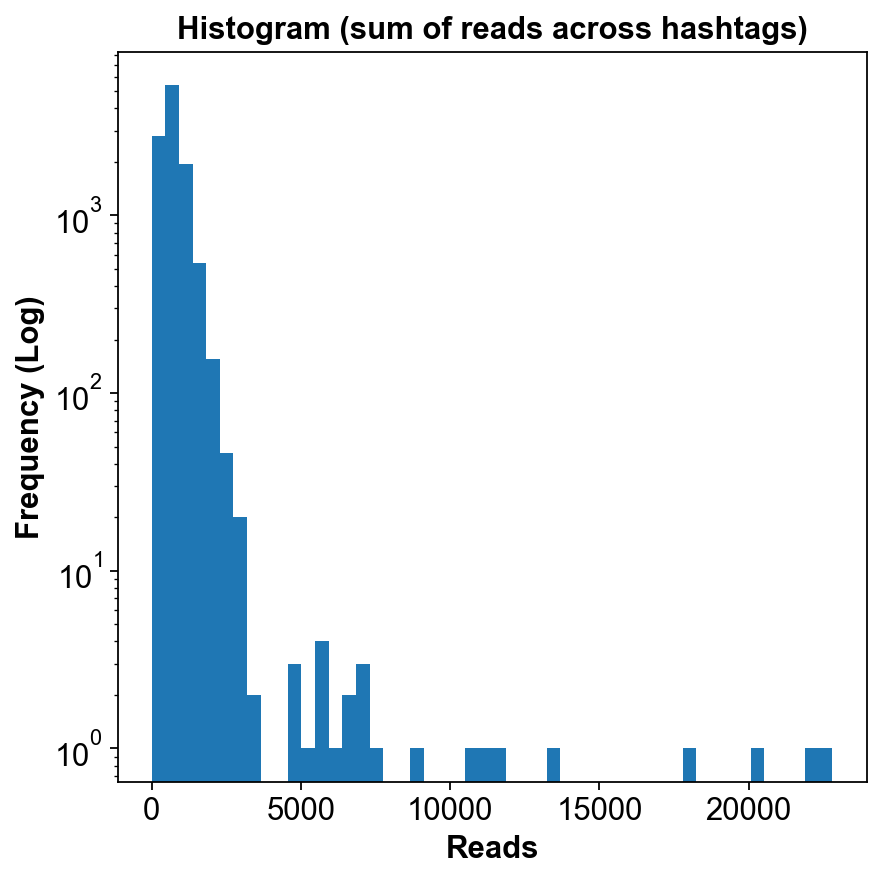

In [43]:
fig, ax = plt.subplots(figsize=(6,6), facecolor="white")

ax.hist(adata.obs["total_reads"].sort_values(ascending=False), bins=50)

ax.set_xlabel("Reads", fontweight="bold")
ax.set_ylabel("Frequency (Log)", fontweight="bold")
ax.set_title("Histogram (sum of reads across hashtags)", fontweight="bold")
ax.grid(b=False)

plt.yscale("log")
plt.show()

### Histogram (sum of reads per hashtag)

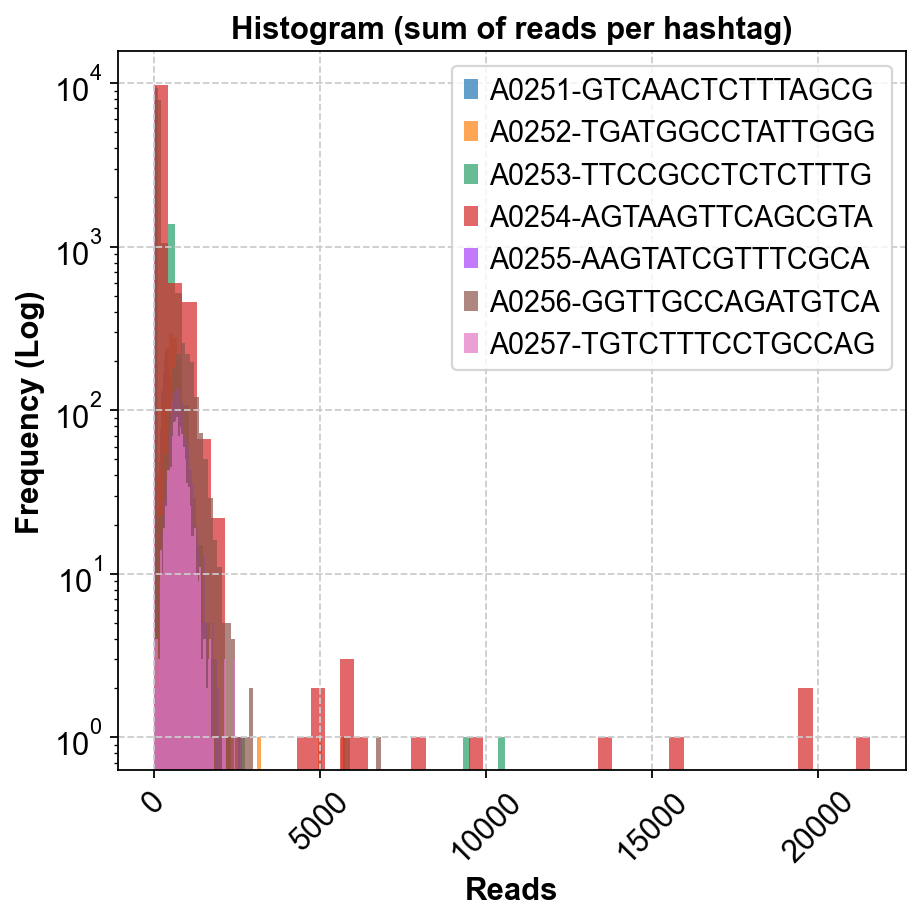

In [44]:
fig, ax = plt.subplots(figsize=(6, 6), facecolor="white")
    
for idx, col in enumerate(adata.var_names):
    
    df_tmp = np.sort(adata.layers["reads"][:, idx].A.ravel())[::-1]

    ax.hist(df_tmp, bins=50, alpha=0.7, label=col)

ax.set_xlabel("Reads", fontweight="bold")
ax.set_ylabel("Frequency (Log)", fontweight="bold")
ax.tick_params(axis="x", rotation=45)
ax.set_title("Histogram (sum of reads per hashtag)", fontweight="bold")
ax.grid(b=True, linestyle="--")
ax.legend()

plt.yscale("log")
plt.tight_layout()
plt.show()

### Unmapped

In [45]:
adata.obs["unmapped_reads"].sort_values(ascending=False)

126268612721964    818
231754935421741    783
120703436111133    725
226960793098029    638
195554937355164    622
                  ... 
122490786564902      0
122436428123060      0
126682835925812      0
235214378491291      0
120864497878883      0
Name: unmapped_reads, Length: 10957, dtype: int64

In [46]:
adata.obs["unmapped_reads"].sum()

311426

### Total vs. Unmapped Reads

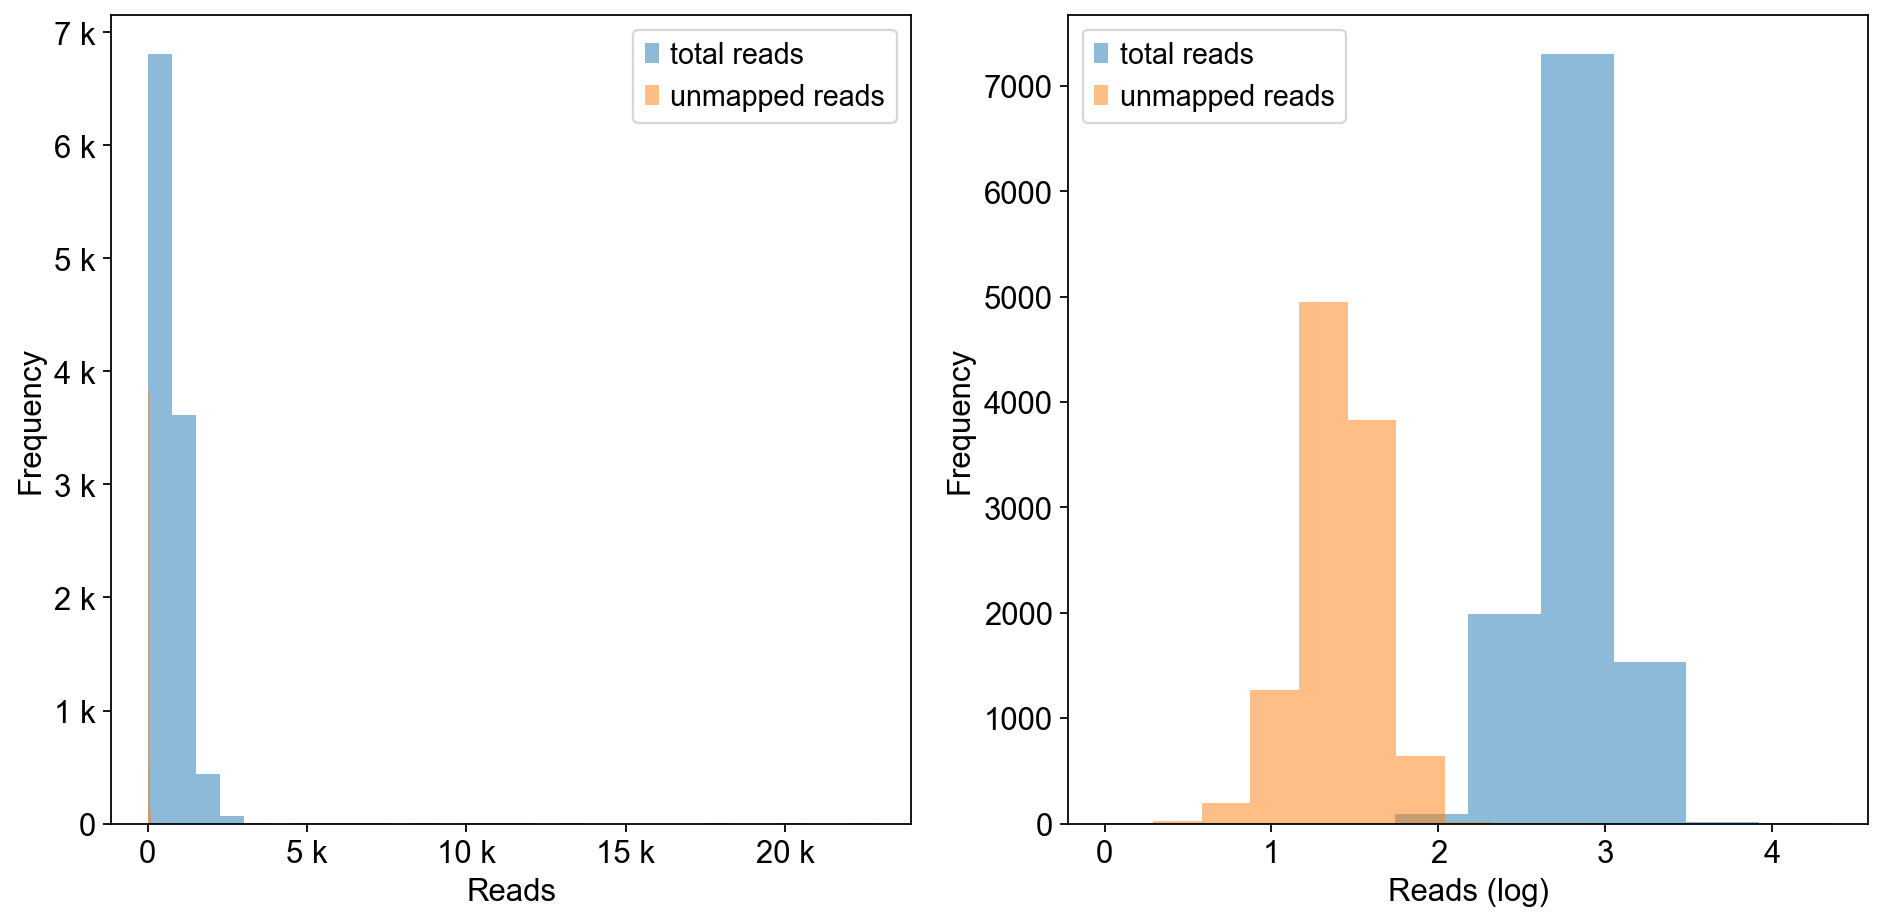

In [47]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 6), facecolor="white")
ax = np.ravel(ax)

ax[0].hist(adata.obs["total_reads"], bins=30, label="total reads", alpha=0.5)
ax[0].hist(adata.obs["unmapped_reads"], bins=30, label="unmapped reads", alpha=0.5)

ax[0].set_xlabel("Reads")
ax[0].set_ylabel("Frequency")
ax[0].xaxis.set_major_formatter(matplotlib.ticker.EngFormatter())
ax[0].yaxis.set_major_formatter(matplotlib.ticker.EngFormatter())
ax[0].grid(b=False)
ax[0].legend()

ax[1].hist(np.log10(adata.obs["total_reads"] + 1), label="total reads", alpha=0.5)
ax[1].hist(np.log10(adata.obs["unmapped_reads"] + 1), label="unmapped reads", alpha=0.5)

ax[1].set_xlabel("Reads (log)")
ax[1].set_ylabel("Frequency")
ax[1].grid(b=False)
ax[1].legend()

plt.tight_layout()
plt.show()

## UMI Counts

In [48]:
adata.to_df()

A0251-GTCAACTCTTTAGCG  A0252-TGATGGCCTATTGGG  \
227303201131438                      0                    408   
191766864546027                      0                    533   
227434332055453                      0                      0   
133921842280299                      0                      0   
165239984667435                      1                      1   
...                                ...                    ...   
197281467784107                    423                      0   
205861516597556                    324                      4   
196576840146219                      0                    572   
162072265964956                      1                      1   
122490813798755                    259                      1   

                 A0253-TTCCGCCTCTCTTTG  A0254-AGTAAGTTCAGCGTA  \
227303201131438                    329                      9   
191766864546027                      1                      3   
227434332055453                      0                      1   
133921842280299                      1                      1   
165239984667435                      2                      3   
...                                ...                    ...   
197281467784107                      2                      5   
205861516597556                      2                      4   
196576840146219                      2                     50   
162072265964956                      0                      2   
122490813798755                      2                      2   

                 A0255-AAGTATCGTTTCGCA  A0256-GGTTGCCAGATGTCA  \
227303201131438                      2                      0   
191766864546027                      1                      1   
227434332055453                      0                    235   
133921842280299                    490                      0   
165239984667435                      0                      1   
...                                ...                    ...   
197281467784107                      0                      2   
205861516597556                      0                      0   
196576840146219                      2                      1   
162072265964956                      0                      1   
122490813798755                      2                      0   

                 A0257-TGTCTTTCCTGCCAG  
227303201131438                      1  
191766864546027                      0  
227434332055453                      1  
133921842280299                      0  
165239984667435                    607  
...                                ...  
197281467784107                      1  
205861516597556                      0  
196576840146219                      0  
162072265964956                    472  
122490813798755                      0  

[10957 rows x 7 columns]

In [49]:
# total UMIs per cell barcode
adata.obs["total_umis"] = adata.X.sum(axis=1).A1

### Histogram (sum of UMIs across hashtag)

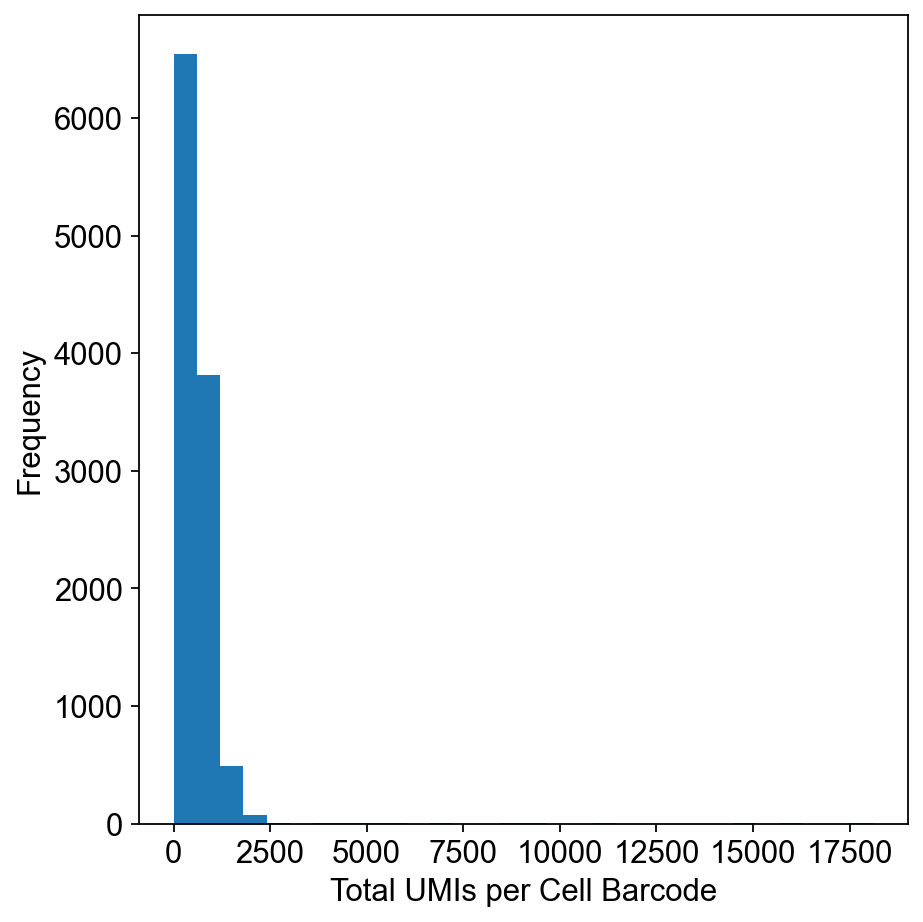

In [50]:
fig, ax = plt.subplots(figsize=(6, 6), facecolor="white")

ax.hist(adata.obs["total_umis"], bins=30)
ax.set_xlabel("Total UMIs per Cell Barcode")
ax.set_ylabel("Frequency")
ax.grid(b=False)

plt.tight_layout()
plt.show()

In [51]:
adata.to_df().describe()

A0251-GTCAACTCTTTAGCG  A0252-TGATGGCCTATTGGG  A0253-TTCCGCCTCTCTTTG  \
count           10957.000000           10957.000000           10957.000000   
mean               63.323994              65.425573             125.839828   
std               145.966145             190.989659             239.422077   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               1.000000   
50%                 1.000000               1.000000               2.000000   
75%                 2.000000               3.000000             274.000000   
max              1610.000000            4642.000000            8536.000000   

       A0254-AGTAAGTTCAGCGTA  A0255-AAGTATCGTTTCGCA  A0256-GGTTGCCAGATGTCA  \
count           10957.000000           10957.000000           10957.000000   
mean               93.008762              89.748745             114.346628   
std               415.659342             239.239001             304.011884   
min                 0.000000               0.000000               0.000000   
25%                 2.000000               0.000000               0.000000   
50%                 4.000000               1.000000               1.000000   
75%                 6.000000               2.000000               2.000000   
max             17070.000000            2170.000000            5546.000000   

       A0257-TGTCTTTCCTGCCAG  
count           10957.000000  
mean               63.653372  
std               204.819884  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 2.000000  
max              2004.000000

## Reads per UMI

### Calculate

In [52]:
# reads divided by UMI, replace NaN with zero
reads_per_umi = np.nan_to_num(adata.layers["reads"] / adata.X)

In [53]:
pd.DataFrame(reads_per_umi)

0         1         2         3         4         5         6
0      0.000000  1.223039  1.237082  1.222222  1.500000  0.000000  1.000000
1      0.000000  1.204503  1.000000  1.000000  1.000000  1.000000  0.000000
2      0.000000  0.000000  0.000000  1.000000  0.000000  1.234043  2.000000
3      0.000000  0.000000  2.000000  1.000000  1.208163  0.000000  0.000000
4      1.000000  1.000000  1.000000  1.000000  0.000000  3.000000  1.169687
...         ...       ...       ...       ...       ...       ...       ...
10952  1.241135  0.000000  1.500000  1.200000  0.000000  1.000000  1.000000
10953  1.154321  1.250000  1.000000  1.000000  0.000000  0.000000  0.000000
10954  0.000000  1.232517  1.000000  1.260000  1.000000  1.000000  0.000000
10955  1.000000  1.000000  0.000000  1.000000  0.000000  1.000000  1.243644
10956  1.185328  2.000000  1.000000  1.000000  1.000000  0.000000  0.000000

[10957 rows x 7 columns]

In [54]:
adata.obs["total_umis"].sum()

6742356

In [55]:
adata.obs["total_reads"].sum()

8234964

In [56]:
avg_reads_per_umi= adata.obs["total_reads"].sum() / adata.obs["total_umis"].sum()
avg_reads_per_umi

1.2213778091812417

### Histogram

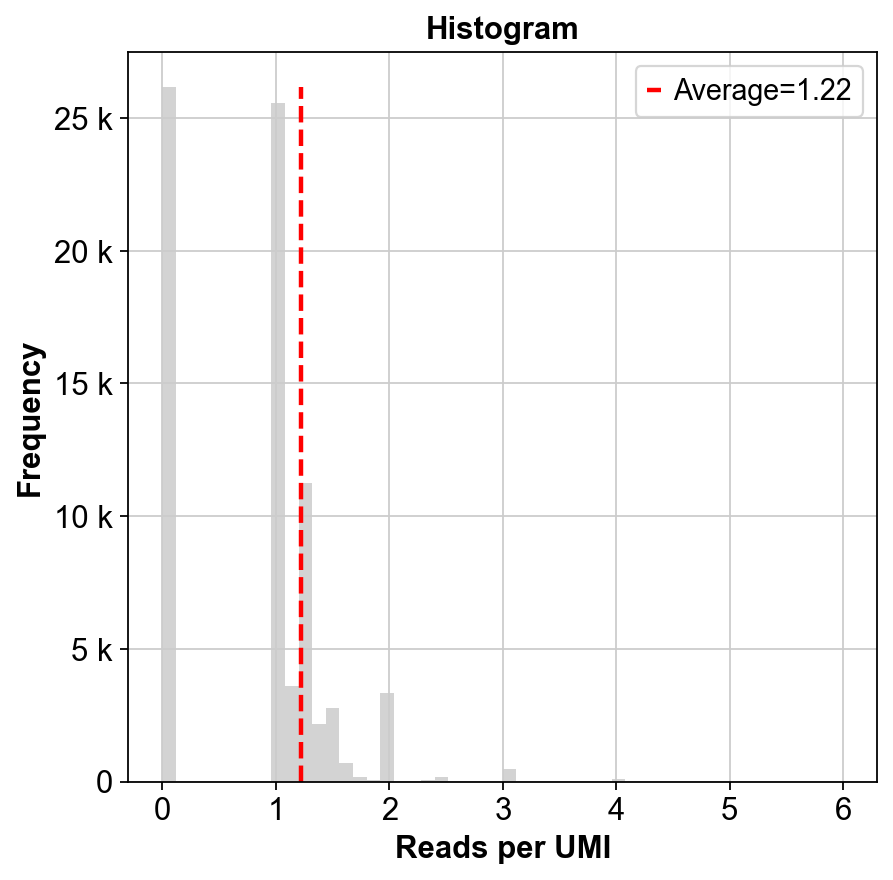

In [57]:
fig, ax = plt.subplots(figsize=(6,6), facecolor="white")

n, bins, _ = ax.hist(reads_per_umi.A1, bins=50, color="lightgray")
ax.vlines(
    x=avg_reads_per_umi,
    ymin=0, ymax=np.max(n),
    color="red", linestyle="--", lw=2,
    label=f"Average={avg_reads_per_umi:.2f}"
)

ax.set_xlabel("Reads per UMI", fontweight="bold")
ax.set_ylabel("Frequency", fontweight="bold")
ax.yaxis.set_major_formatter(matplotlib.ticker.EngFormatter())
ax.set_title("Histogram", fontweight="bold")
ax.legend()

plt.show()

## UMI (one vs. rest)

- Ideally, the winning one shouldn't be winning by having less than e.g. 10 UMIs?
- Ideally, the losing ones should have UMIs close to zero.

### All

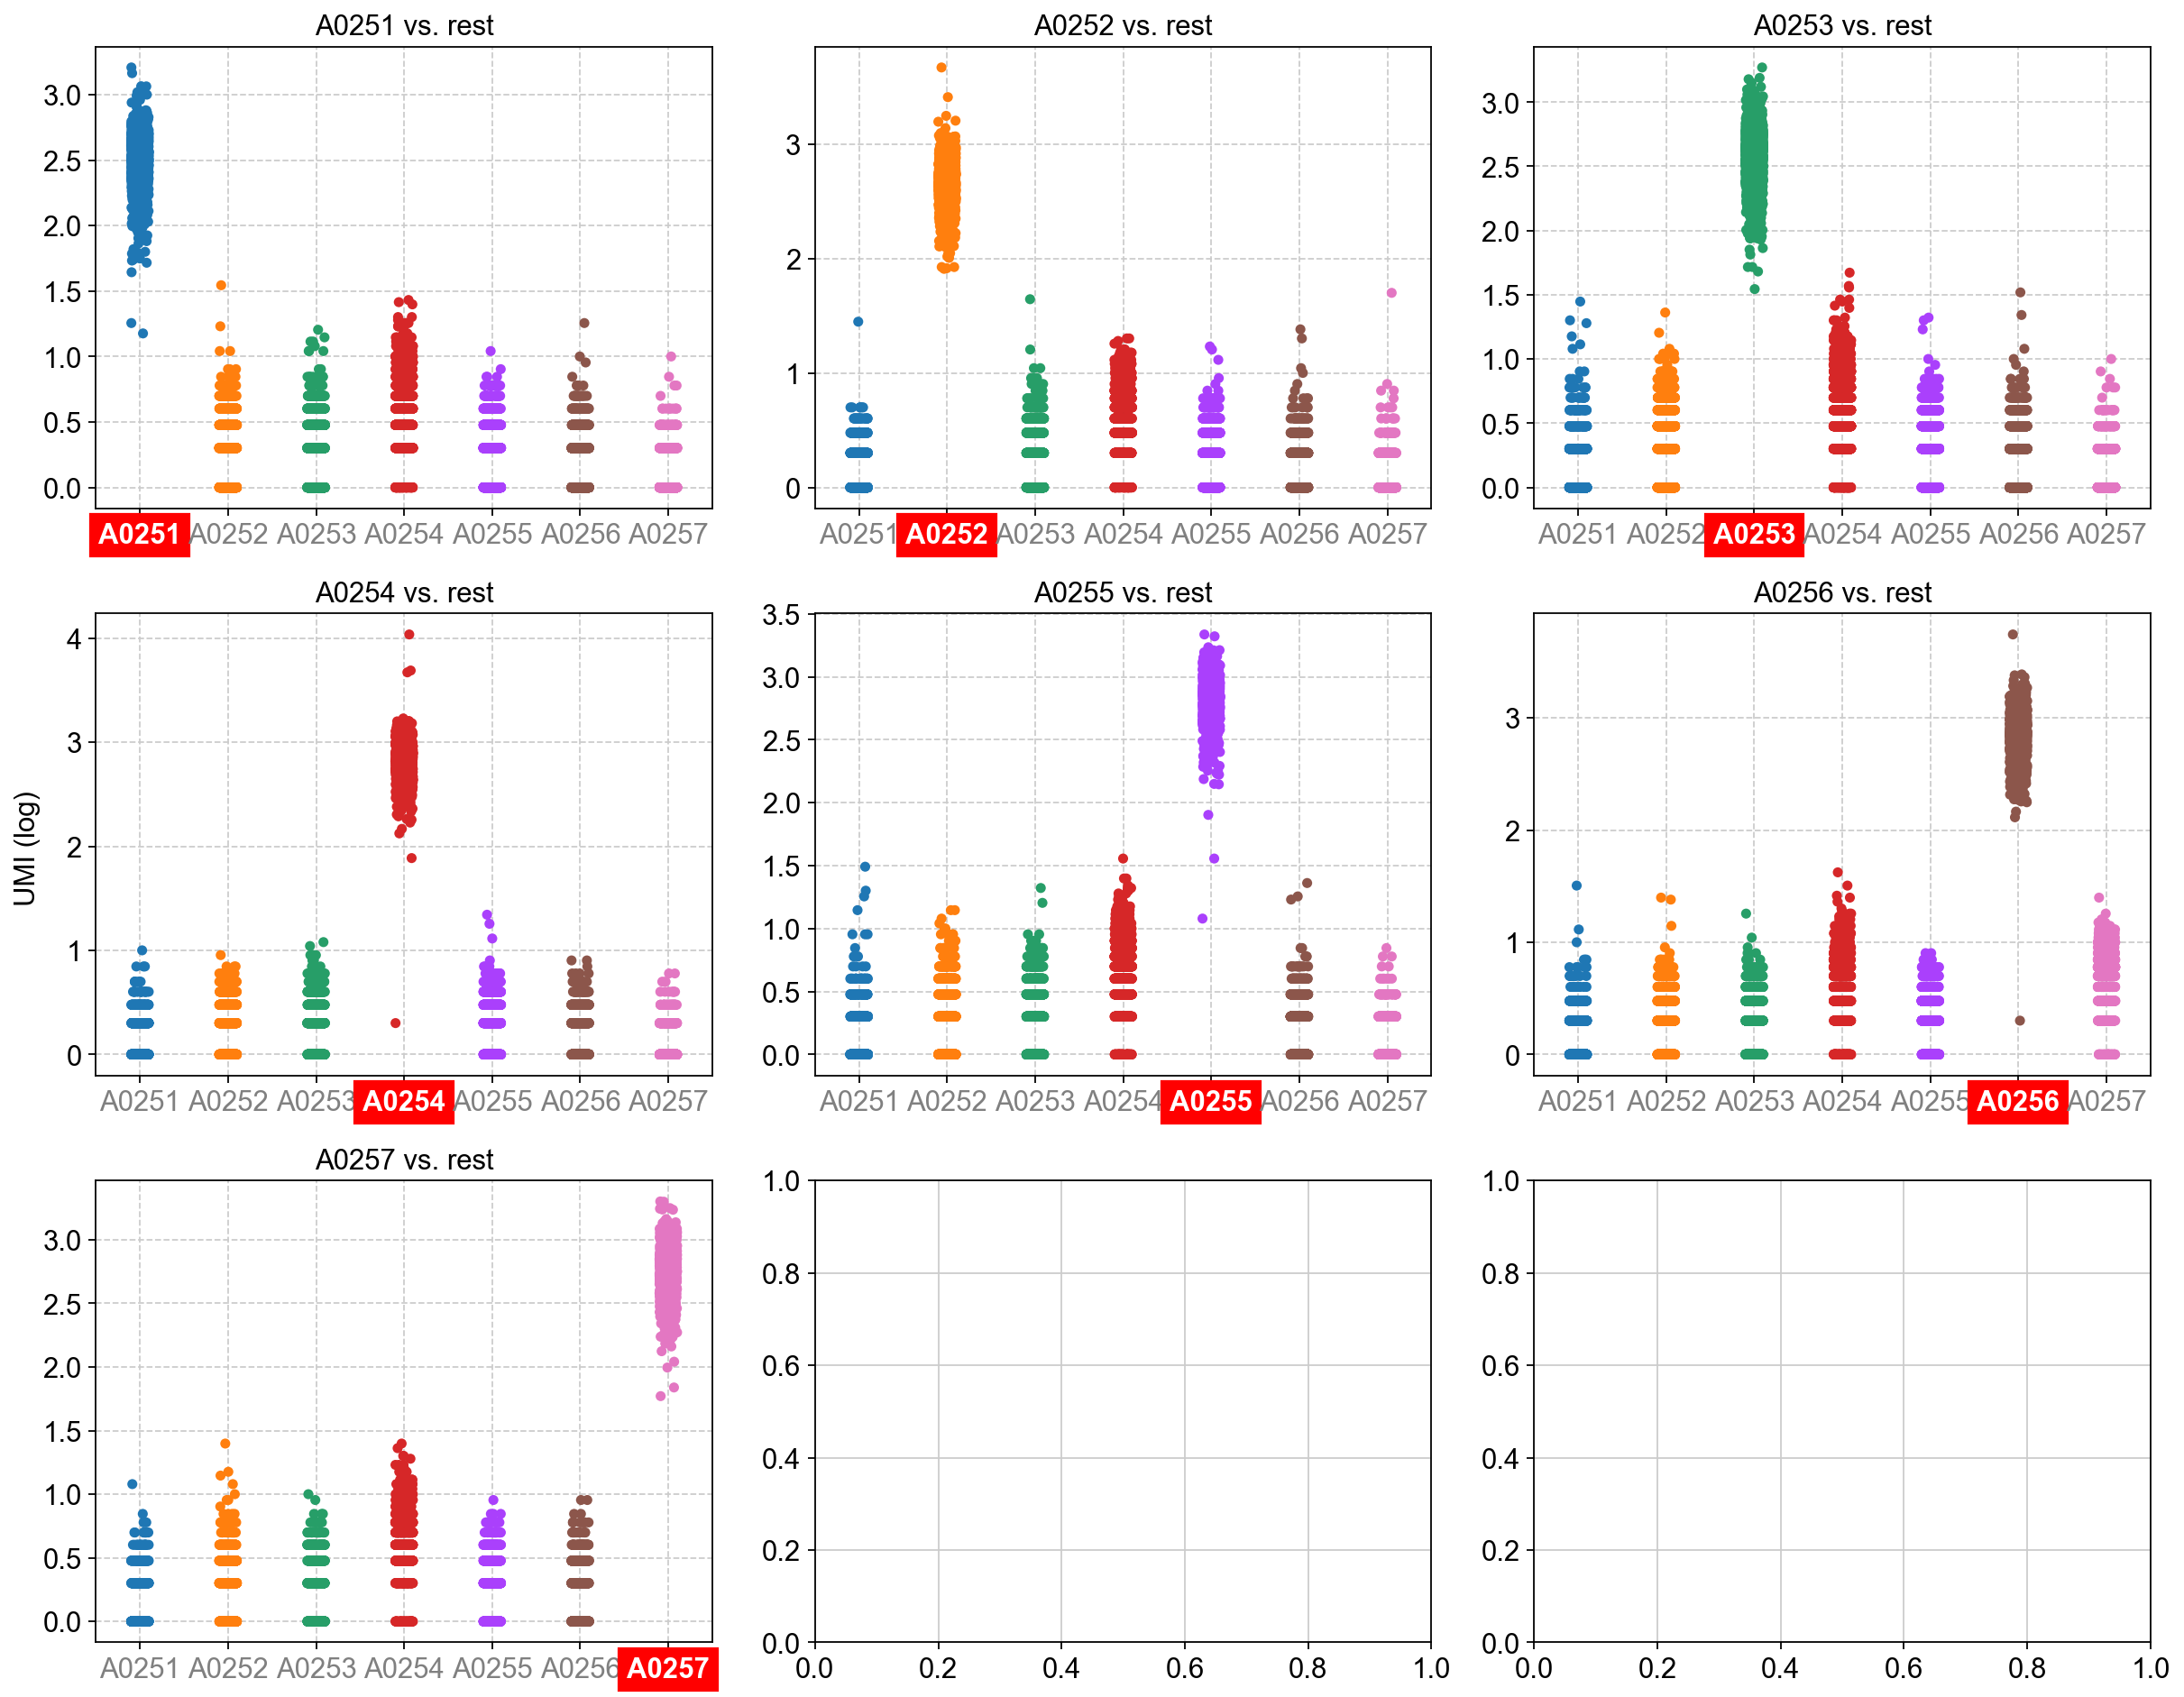

In [58]:
num_hashtags = len(adata.var_names)
num_cols = 3
num_rows = math.ceil(num_hashtags / num_cols)

fig, axes = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(15, num_rows * 4), facecolor="white")
axes = np.ravel(axes)

for idx, hashtag in enumerate(sorted(hashtags)):

    ax = axes[idx]

    df_tmp = adata[adata.obs["hash_id"] == hashtag].to_df()
    df_tmp.columns = df_tmp.columns.str.split("-").str[0]

    sns.stripplot(data=np.log10(df_tmp + 1), ax=ax)

    ax.set_title(f"{hashtag} vs. rest")
    ax.grid(b=True, linestyle="--")

    for tick in ax.xaxis.get_major_ticks():
        if tick.label.get_text() == hashtag:
            tick.label.set_color("white")
            tick.label.set_fontweight("heavy")
            tick.label.set_backgroundcolor("red")
        else:
            tick.label.set_color("gray")

fig.text(-0.01, 0.5, "UMI (log)", va='center', rotation='vertical')
plt.tight_layout()
plt.show()

### 25th Percentile

In [59]:
umi_sum_percentile_25 = adata.obs["total_umis"].describe()["25%"]
umi_sum_percentile_25

372.0

In [60]:
adata[ (adata.obs["total_umis"] < umi_sum_percentile_25) & (adata.obs["hash_id"] != "Doublet") ].to_df()

A0251-GTCAACTCTTTAGCG  A0252-TGATGGCCTATTGGG  \
227434332055453                      0                      0   
170678352992099                    245                      0   
240695043382683                    361                      1   
236845410696028                      1                      0   
195418285102812                      0                      0   
...                                ...                    ...   
230748973090652                    336                      2   
239458986089772                      0                      1   
157604587195227                    234                      1   
205861516597556                    324                      4   
122490813798755                    259                      1   

                 A0253-TTCCGCCTCTCTTTG  A0254-AGTAAGTTCAGCGTA  \
227434332055453                      0                      1   
170678352992099                      0                      3   
240695043382683                      2                      0   
236845410696028                    340                      4   
195418285102812                    265                      0   
...                                ...                    ...   
230748973090652                      3                      1   
239458986089772                    352                      3   
157604587195227                     12                     11   
205861516597556                      2                      4   
122490813798755                      2                      2   

                 A0255-AAGTATCGTTTCGCA  A0256-GGTTGCCAGATGTCA  \
227434332055453                      0                    235   
170678352992099                      0                      0   
240695043382683                      0                      0   
236845410696028                      2                      1   
195418285102812                      5                      0   
...                                ...                    ...   
230748973090652                      1                      2   
239458986089772                      0                      0   
157604587195227                      0                      0   
205861516597556                      0                      0   
122490813798755                      2                      0   

                 A0257-TGTCTTTCCTGCCAG  
227434332055453                      1  
170678352992099                      0  
240695043382683                      0  
236845410696028                      1  
195418285102812                      1  
...                                ...  
230748973090652                      0  
239458986089772                      0  
157604587195227                      0  
205861516597556                      0  
122490813798755                      0  

[2692 rows x 7 columns]

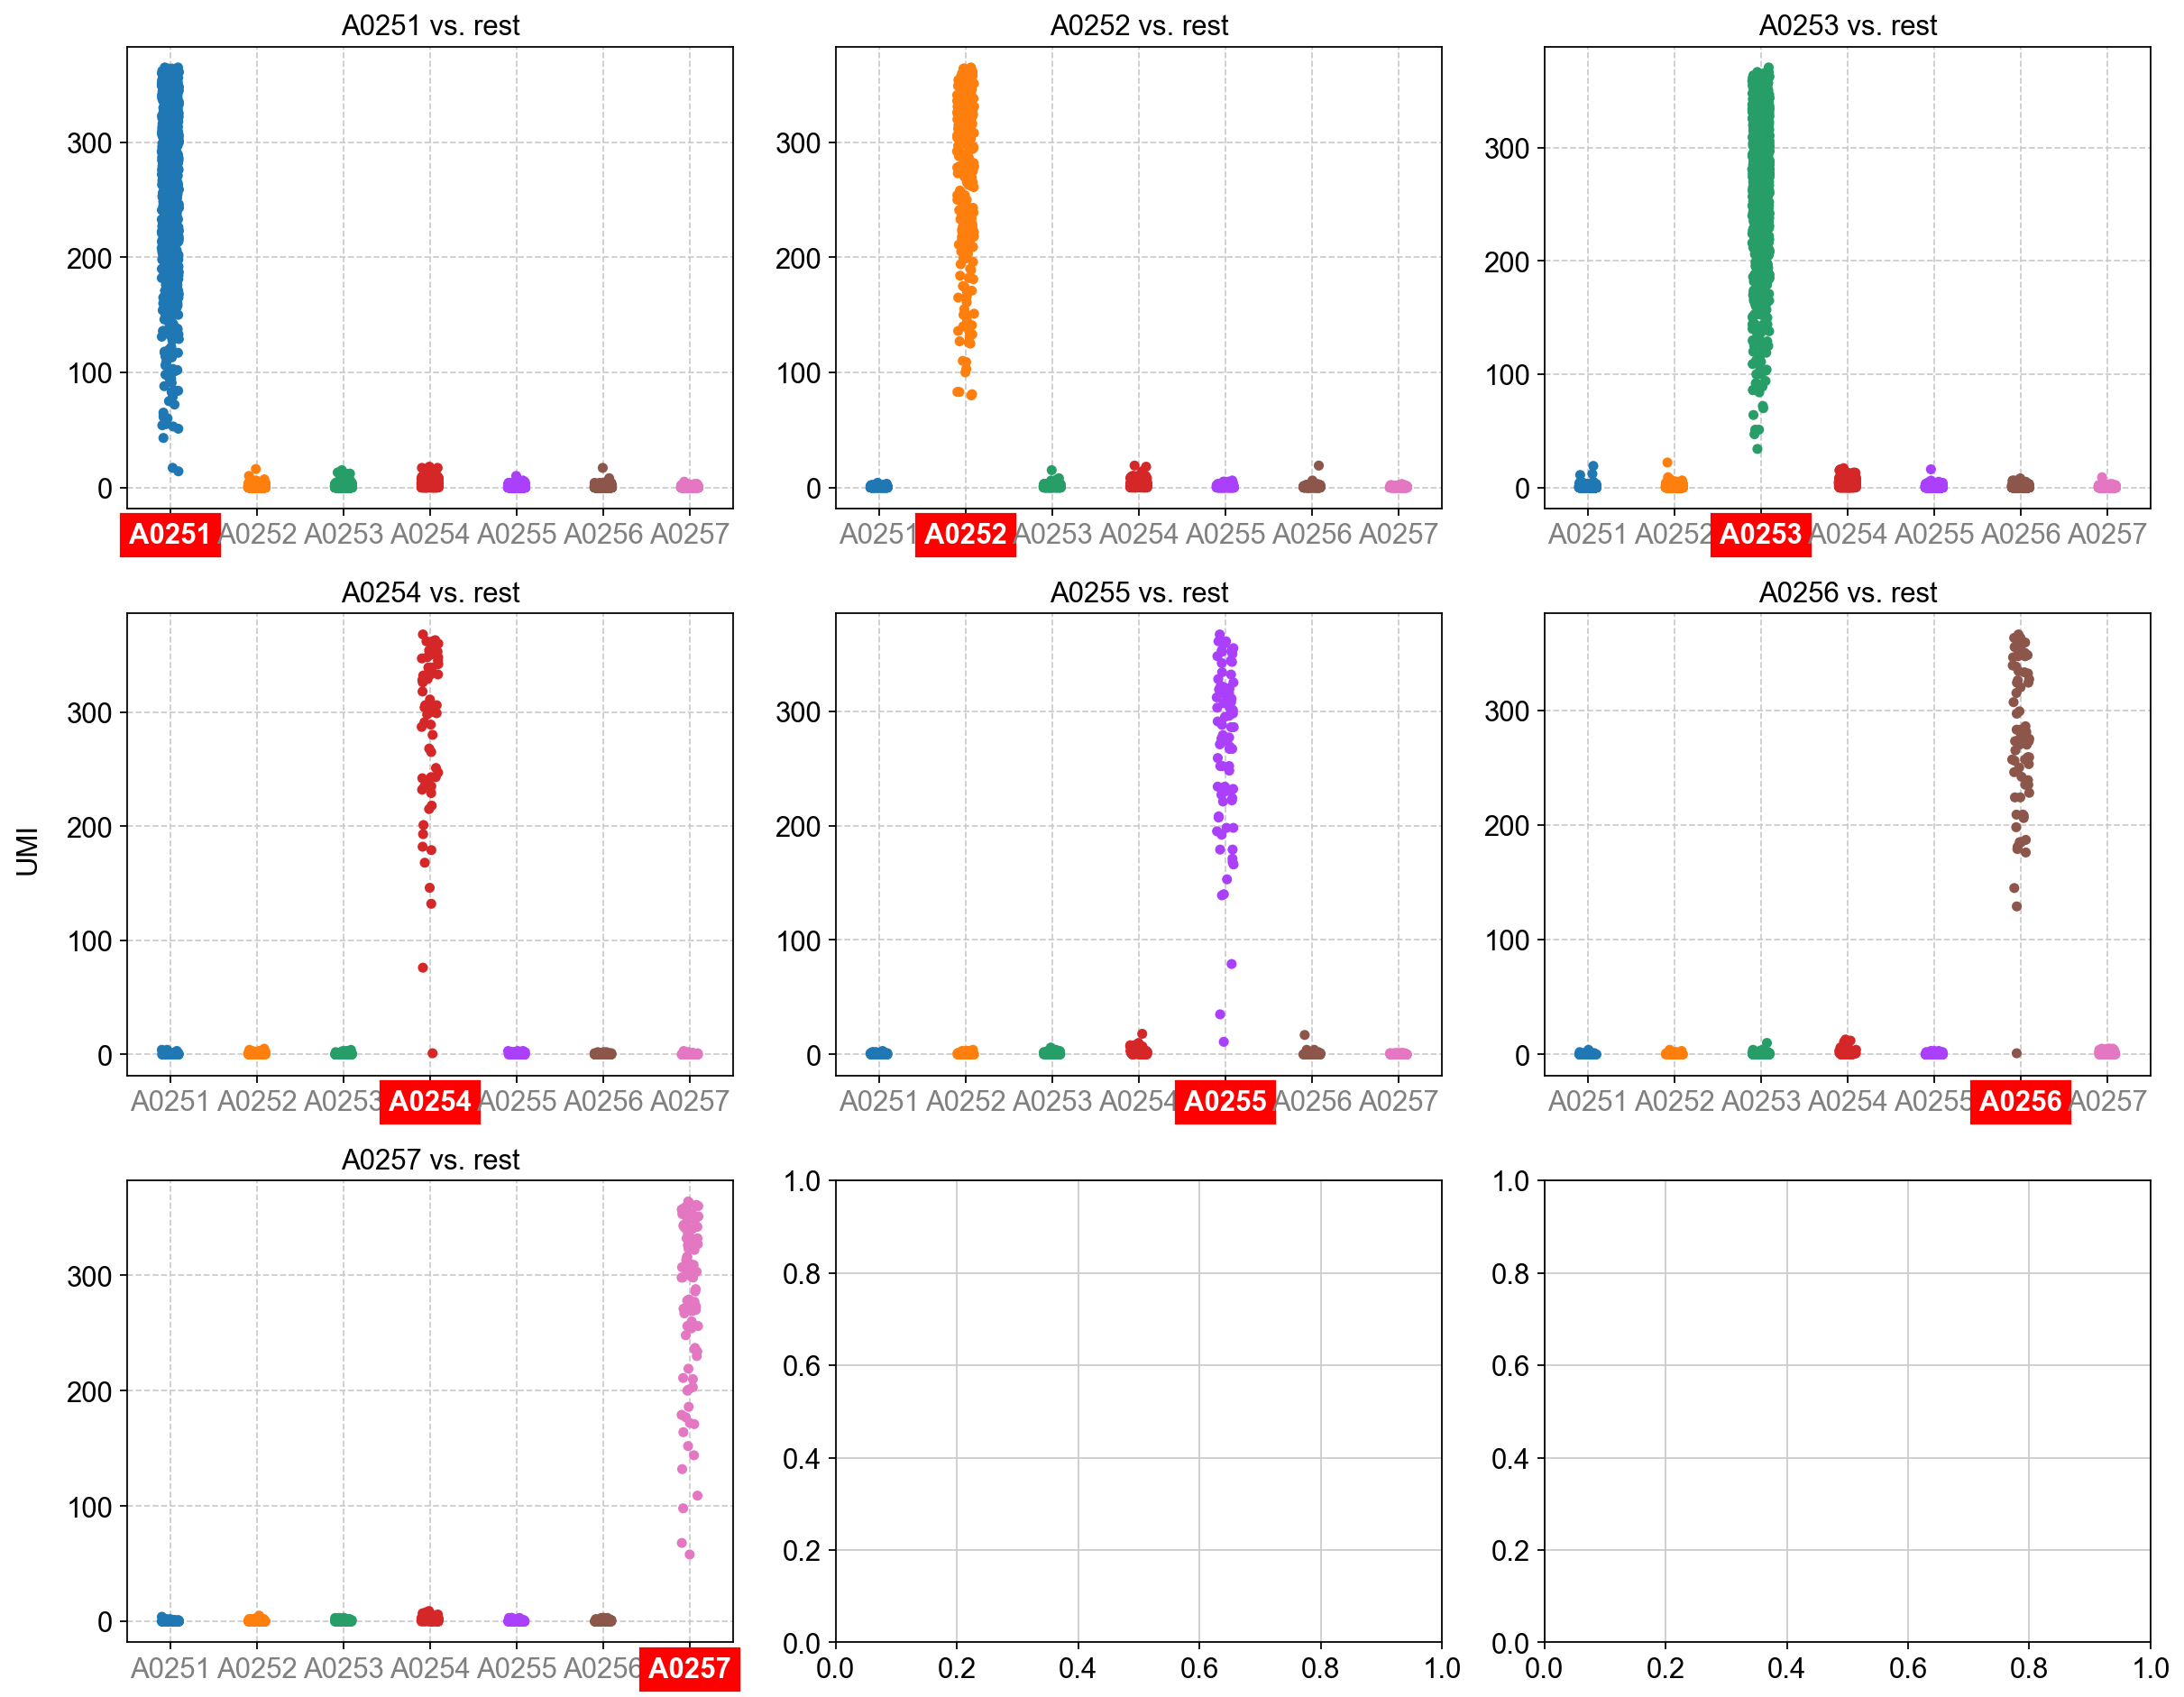

In [61]:
num_hashtags = len(adata.var_names)
num_cols = 3
num_rows = math.ceil(num_hashtags / num_cols)

fig, axes = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(15, num_rows * 4), facecolor="white")
axes = np.ravel(axes)

for idx, hashtag in enumerate(sorted(hashtags)):

    ax = axes[idx]

    df_tmp = adata[ (adata.obs["total_umis"] < umi_sum_percentile_25) & (adata.obs["hash_id"] == hashtag) ].to_df()
    df_tmp.columns = df_tmp.columns.str.split("-").str[0]

    sns.stripplot(data=df_tmp, ax=ax)

    ax.set_title(f"{hashtag} vs. rest")
    ax.grid(b=True, linestyle="--")

    for tick in ax.xaxis.get_major_ticks():
        if tick.label.get_text() == hashtag:
            tick.label.set_color("white")
            tick.label.set_fontweight("heavy")
            tick.label.set_backgroundcolor("red")
        else:
            tick.label.set_color("gray")

fig.text(-0.01, 0.5, "UMI", va='center', rotation='vertical')
plt.tight_layout()
plt.show()

## UMI Distribution

/Users/chunj/opt/miniconda3/envs/sharp/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if sys.path[0] == '':


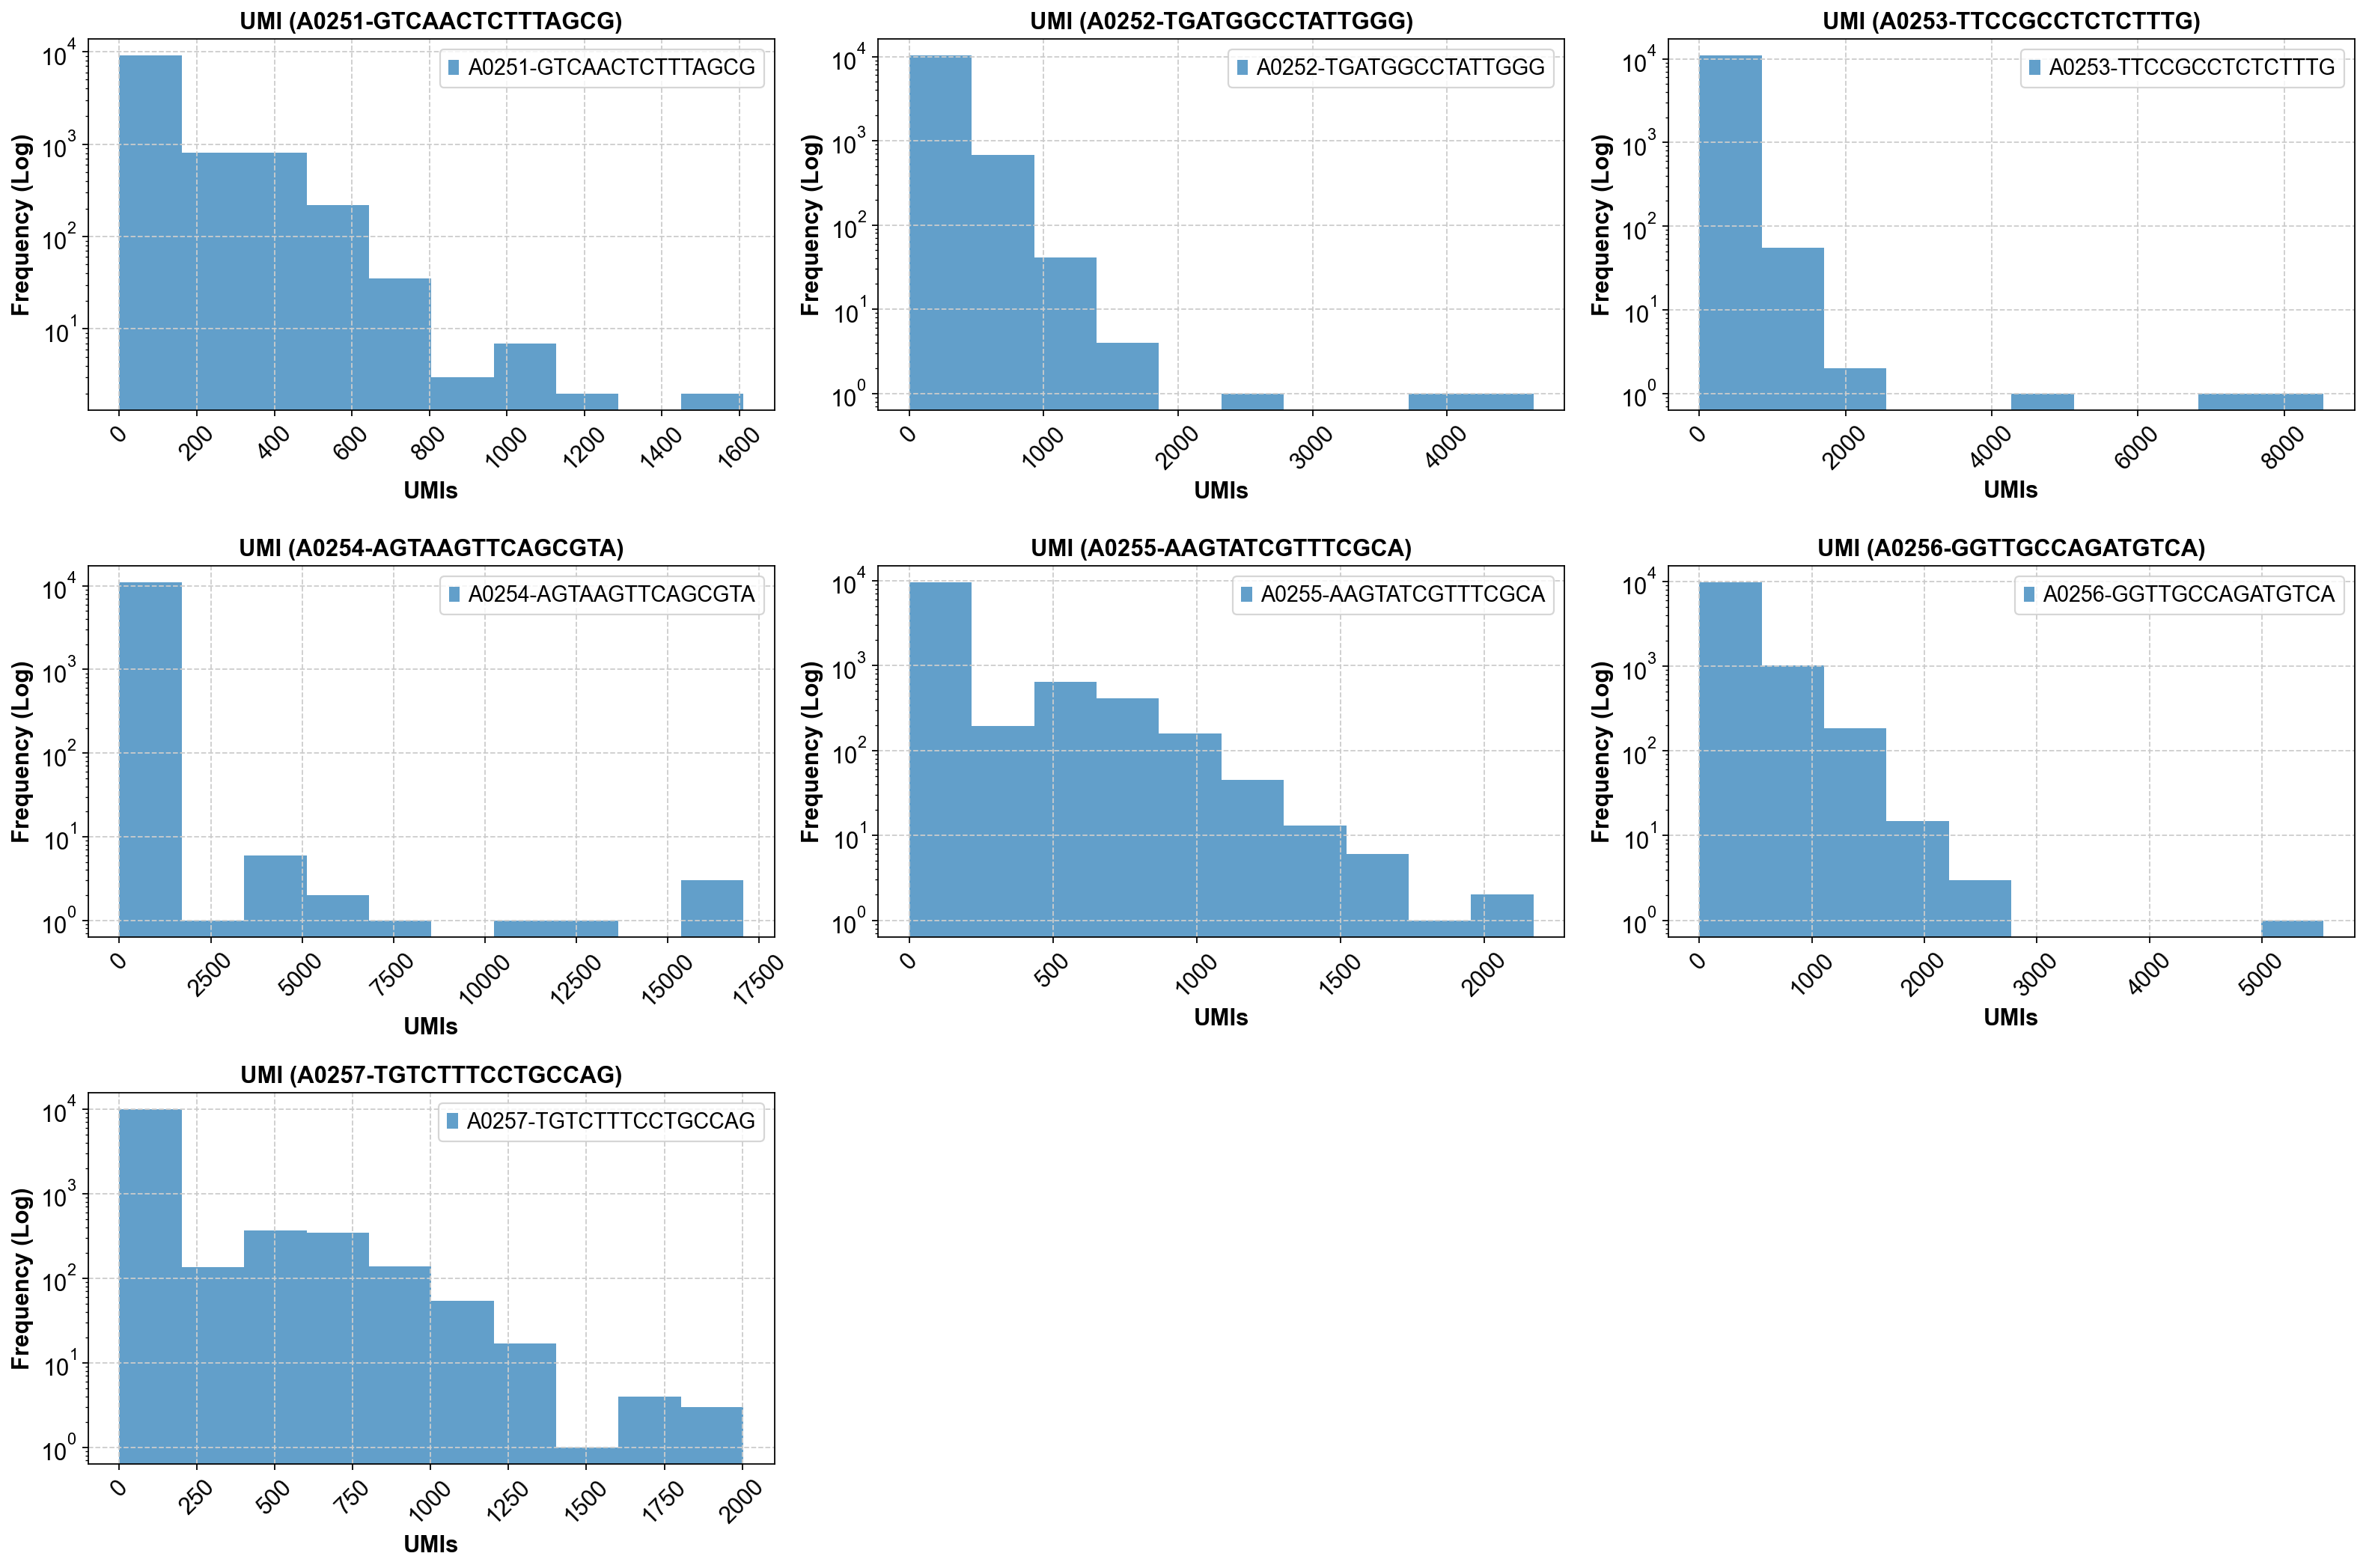

In [62]:
num_hashtags = len(adata.var_names)
num_cols = 3
num_rows = num_hashtags / num_cols + 1

fig = plt.figure(figsize=(20, num_rows * 4), facecolor="white")

idx_plot = 0

for idx, col in enumerate(adata.var_names):

    idx_plot += 1
    ax = fig.add_subplot(num_rows, num_cols, idx_plot)
    
    df_tmp = adata[:, idx].to_df().sort_values(by=adata.var_names[idx], ascending=False)

    ax.hist(df_tmp, bins=10, alpha=0.7, label=col)

    ax.set_xlabel("UMIs", fontweight="bold")
    ax.set_ylabel("Frequency (Log)", fontweight="bold")
    ax.tick_params(axis="x", rotation=45)
    ax.set_title(f"UMI ({col})", fontweight="bold")
    ax.grid(b=True, linestyle="--")
    ax.set_yscale("log")
    ax.legend()

plt.tight_layout()
plt.show()

## Negative Check

In [63]:
# sort by total umi in descending order
adata_sorted = adata[adata.obs.sort_values(by="total_umis", ascending=False).index]

In [64]:
adata_sorted.to_df()

A0251-GTCAACTCTTTAGCG  A0252-TGATGGCCTATTGGG  \
126268612721964                      1                      0   
231754935421741                      2                      7   
120703436111133                      0                    503   
195554937355164                      0                    450   
134585729570651                      0                      0   
...                                ...                    ...   
230677806501099                      0                      0   
125238491630507                      0                      0   
134513488743659                      0                      0   
239460343532779                      0                      0   
125238491662763                      0                      0   

                 A0253-TTCCGCCTCTCTTTG  A0254-AGTAAGTTCAGCGTA  \
126268612721964                      1                  17070   
231754935421741                      4                  15648   
120703436111133                      1                  15721   
195554937355164                      0                  12533   
134585729570651                      1                  10850   
...                                ...                    ...   
230677806501099                      0                      0   
125238491630507                      0                      0   
134513488743659                      0                      0   
239460343532779                      0                      0   
125238491662763                      0                      0   

                 A0255-AAGTATCGTTTCGCA  A0256-GGTTGCCAGATGTCA  \
126268612721964                      8                      5   
231754935421741                     13                   1233   
120703436111133                     11                      2   
195554937355164                      4                    682   
134585729570651                      7                      4   
...                                ...                    ...   
230677806501099                      0                      0   
125238491630507                      0                      0   
134513488743659                      0                      0   
239460343532779                      0                      0   
125238491662763                      0                      0   

                 A0257-TGTCTTTCCTGCCAG  
126268612721964                   1014  
231754935421741                    834  
120703436111133                      1  
195554937355164                    904  
134585729570651                      0  
...                                ...  
230677806501099                      0  
125238491630507                      0  
134513488743659                      0  
239460343532779                      0  
125238491662763                      0  

[10957 rows x 7 columns]

### Zero Rows

In [65]:
adata_sorted[ adata_sorted.obs["total_umis"] == 0 ].to_df()

A0251-GTCAACTCTTTAGCG  A0252-TGATGGCCTATTGGG  \
235214378491291                      0                      0   
125238492219116                      0                      0   
125238491855662                      0                      0   
239406522223851                      0                      0   
230677806501099                      0                      0   
125238491630507                      0                      0   
134513488743659                      0                      0   
239460343532779                      0                      0   
125238491662763                      0                      0   

                 A0253-TTCCGCCTCTCTTTG  A0254-AGTAAGTTCAGCGTA  \
235214378491291                      0                      0   
125238492219116                      0                      0   
125238491855662                      0                      0   
239406522223851                      0                      0   
230677806501099                      0                      0   
125238491630507                      0                      0   
134513488743659                      0                      0   
239460343532779                      0                      0   
125238491662763                      0                      0   

                 A0255-AAGTATCGTTTCGCA  A0256-GGTTGCCAGATGTCA  \
235214378491291                      0                      0   
125238492219116                      0                      0   
125238491855662                      0                      0   
239406522223851                      0                      0   
230677806501099                      0                      0   
125238491630507                      0                      0   
134513488743659                      0                      0   
239460343532779                      0                      0   
125238491662763                      0                      0   

                 A0257-TGTCTTTCCTGCCAG  
235214378491291                      0  
125238492219116                      0  
125238491855662                      0  
239406522223851                      0  
230677806501099                      0  
125238491630507                      0  
134513488743659                      0  
239460343532779                      0  
125238491662763                      0

In [66]:
adata_sorted[ adata_sorted.obs["total_umis"] == 0 ].shape

(9, 7)

In [67]:
# percentage
np.count_nonzero(adata_sorted.obs["total_umis"] == 0) / adata_sorted.shape[0] * 100.0

0.08213927169845761

### Singlets

In [68]:
mask_singlet = (adata_sorted.obs["hash_id"] != "Doublet") & (adata_sorted.obs["hash_id"] != "Negative")
mask_singlet

126268612721964    False
231754935421741    False
120703436111133    False
195554937355164    False
134585729570651     True
                   ...  
230677806501099    False
125238491630507    False
134513488743659    False
239460343532779    False
125238491662763    False
Name: hash_id, Length: 10957, dtype: bool

In [69]:
adata_sorted[mask_singlet]

View of AnnData object with n_obs × n_vars = 9935 × 7
    obs: 'unmapped', 'barcode_sequence', 'hash_id', 'unmapped_reads', 'total_reads', 'total_umis'
    var: 'feature_name', 'total_reads'
    layers: 'reads'

In [70]:
adata_sorted[mask_singlet].to_df()

A0251-GTCAACTCTTTAGCG  A0252-TGATGGCCTATTGGG  \
134585729570651                      0                      0   
125257194105635                      0                      1   
157131055163165                      0                      1   
200982521593251                      4                      1   
191164522057004                      1                   4642   
...                                ...                    ...   
204908283221805                     17                      0   
231282308437941                     14                      0   
126682835925812                      0                      0   
122490786564902                      0                      0   
199807070756251                      0                      0   

                 A0253-TTCCGCCTCTCTTTG  A0254-AGTAAGTTCAGCGTA  \
134585729570651                      1                  10850   
125257194105635                      3                      2   
157131055163165                      2                   4886   
200982521593251                      0                   4691   
191164522057004                      0                      4   
...                                ...                    ...   
204908283221805                      1                      3   
231282308437941                      0                      2   
126682835925812                      0                      0   
122490786564902                      0                      0   
199807070756251                      0                      1   

                 A0255-AAGTATCGTTTCGCA  A0256-GGTTGCCAGATGTCA  \
134585729570651                      7                      4   
125257194105635                      2                   5546   
157131055163165                      5                      2   
200982521593251                      4                      0   
191164522057004                      1                      0   
...                                ...                    ...   
204908283221805                      0                      0   
231282308437941                      0                      1   
126682835925812                     11                      0   
122490786564902                      0                      1   
199807070756251                      0                      0   

                 A0257-TGTCTTTCCTGCCAG  
134585729570651                      0  
125257194105635                     24  
157131055163165                      4  
200982521593251                      0  
191164522057004                      0  
...                                ...  
204908283221805                      0  
231282308437941                      0  
126682835925812                      0  
122490786564902                      0  
199807070756251                      0  

[9935 rows x 7 columns]

In [71]:
# singlet only, total_umis < 10
adata_sorted[mask_singlet & (adata_sorted.obs["total_umis"] < 10)].to_df()

A0251-GTCAACTCTTTAGCG  A0252-TGATGGCCTATTGGG  \
122490786564902                      0                      0   
199807070756251                      0                      0   

                 A0253-TTCCGCCTCTCTTTG  A0254-AGTAAGTTCAGCGTA  \
122490786564902                      0                      0   
199807070756251                      0                      1   

                 A0255-AAGTATCGTTTCGCA  A0256-GGTTGCCAGATGTCA  \
122490786564902                      0                      1   
199807070756251                      0                      0   

                 A0257-TGTCTTTCCTGCCAG  
122490786564902                      0  
199807070756251                      0

In [72]:
# singlet only, total_umis >= 10
adata_sorted[mask_singlet & (adata_sorted.obs["total_umis"] >= 10)].to_df()

A0251-GTCAACTCTTTAGCG  A0252-TGATGGCCTATTGGG  \
134585729570651                      0                      0   
125257194105635                      0                      1   
157131055163165                      0                      1   
200982521593251                      4                      1   
191164522057004                      1                   4642   
...                                ...                    ...   
122436428123060                      0                      1   
226212233211229                      0                      0   
204908283221805                     17                      0   
231282308437941                     14                      0   
126682835925812                      0                      0   

                 A0253-TTCCGCCTCTCTTTG  A0254-AGTAAGTTCAGCGTA  \
134585729570651                      1                  10850   
125257194105635                      3                      2   
157131055163165                      2                   4886   
200982521593251                      0                   4691   
191164522057004                      0                      4   
...                                ...                    ...   
122436428123060                     34                      1   
226212233211229                      0                      0   
204908283221805                      1                      3   
231282308437941                      0                      2   
126682835925812                      0                      0   

                 A0255-AAGTATCGTTTCGCA  A0256-GGTTGCCAGATGTCA  \
134585729570651                      7                      4   
125257194105635                      2                   5546   
157131055163165                      5                      2   
200982521593251                      4                      0   
191164522057004                      1                      0   
...                                ...                    ...   
122436428123060                      0                      0   
226212233211229                     35                      0   
204908283221805                      0                      0   
231282308437941                      0                      1   
126682835925812                     11                      0   

                 A0257-TGTCTTTCCTGCCAG  
134585729570651                      0  
125257194105635                     24  
157131055163165                      4  
200982521593251                      0  
191164522057004                      0  
...                                ...  
122436428123060                      0  
226212233211229                      0  
204908283221805                      0  
231282308437941                      0  
126682835925812                      0  

[9933 rows x 7 columns]

### Doublets

In [73]:
mask_doublet = adata_sorted.obs["hash_id"] == "Doublet"
mask_doublet

126268612721964     True
231754935421741     True
120703436111133     True
195554937355164     True
134585729570651    False
                   ...  
230677806501099     True
125238491630507     True
134513488743659     True
239460343532779     True
125238491662763     True
Name: hash_id, Length: 10957, dtype: bool

In [74]:
adata_sorted[mask_doublet].to_df()

A0251-GTCAACTCTTTAGCG  A0252-TGATGGCCTATTGGG  \
126268612721964                      1                      0   
231754935421741                      2                      7   
120703436111133                      0                    503   
195554937355164                      0                    450   
232250179700469                    337                      2   
...                                ...                    ...   
230677806501099                      0                      0   
125238491630507                      0                      0   
134513488743659                      0                      0   
239460343532779                      0                      0   
125238491662763                      0                      0   

                 A0253-TTCCGCCTCTCTTTG  A0254-AGTAAGTTCAGCGTA  \
126268612721964                      1                  17070   
231754935421741                      4                  15648   
120703436111133                      1                  15721   
195554937355164                      0                  12533   
232250179700469                   8536                      4   
...                                ...                    ...   
230677806501099                      0                      0   
125238491630507                      0                      0   
134513488743659                      0                      0   
239460343532779                      0                      0   
125238491662763                      0                      0   

                 A0255-AAGTATCGTTTCGCA  A0256-GGTTGCCAGATGTCA  \
126268612721964                      8                      5   
231754935421741                     13                   1233   
120703436111133                     11                      2   
195554937355164                      4                    682   
232250179700469                    553                      0   
...                                ...                    ...   
230677806501099                      0                      0   
125238491630507                      0                      0   
134513488743659                      0                      0   
239460343532779                      0                      0   
125238491662763                      0                      0   

                 A0257-TGTCTTTCCTGCCAG  
126268612721964                   1014  
231754935421741                    834  
120703436111133                      1  
195554937355164                    904  
232250179700469                      0  
...                                ...  
230677806501099                      0  
125238491630507                      0  
134513488743659                      0  
239460343532779                      0  
125238491662763                      0  

[1022 rows x 7 columns]

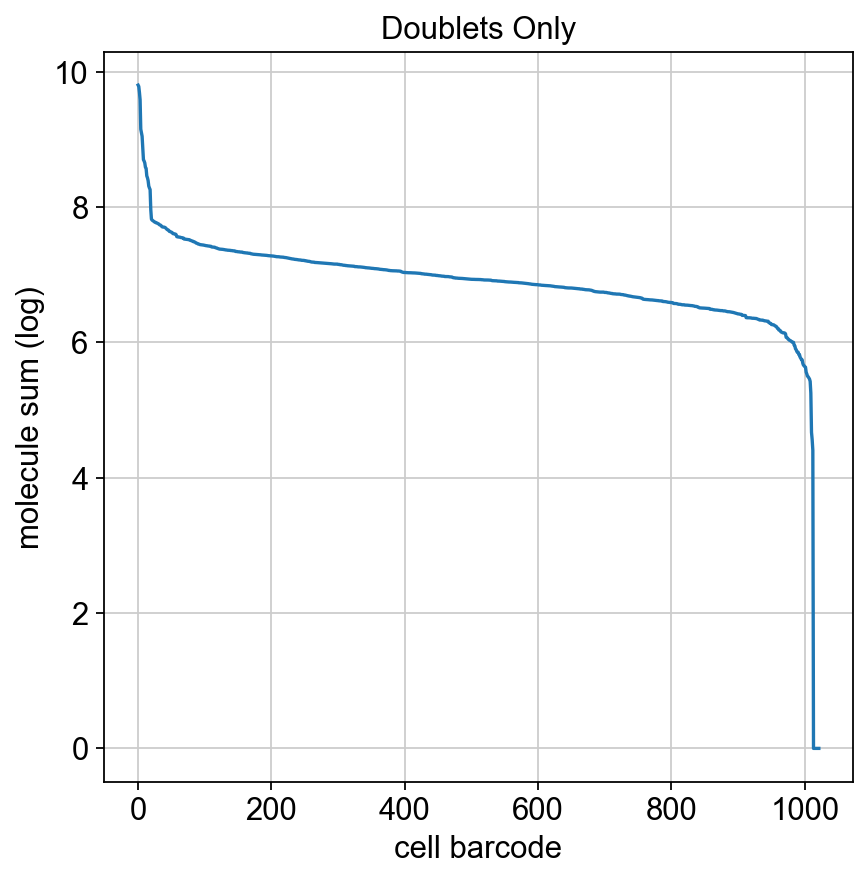

In [75]:
fig, ax = plt.subplots(figsize=(6, 6), facecolor="white")

ax.plot(
    range(0, adata_sorted[mask_doublet].shape[0]),
    np.log(adata_sorted[mask_doublet].obs["total_umis"] + 1)
)
ax.set_ylabel("molecule sum (log)")
ax.set_xlabel("cell barcode")
ax.set_title("Doublets Only")

plt.show()

In [76]:
# doublet only, total_umis < 10
adata_sorted[mask_doublet & (adata_sorted.obs["total_umis"] < 10)].to_df()

A0251-GTCAACTCTTTAGCG  A0252-TGATGGCCTATTGGG  \
235214378491291                      0                      0   
125238492219116                      0                      0   
125238491855662                      0                      0   
239406522223851                      0                      0   
230677806501099                      0                      0   
125238491630507                      0                      0   
134513488743659                      0                      0   
239460343532779                      0                      0   
125238491662763                      0                      0   

                 A0253-TTCCGCCTCTCTTTG  A0254-AGTAAGTTCAGCGTA  \
235214378491291                      0                      0   
125238492219116                      0                      0   
125238491855662                      0                      0   
239406522223851                      0                      0   
230677806501099                      0                      0   
125238491630507                      0                      0   
134513488743659                      0                      0   
239460343532779                      0                      0   
125238491662763                      0                      0   

                 A0255-AAGTATCGTTTCGCA  A0256-GGTTGCCAGATGTCA  \
235214378491291                      0                      0   
125238492219116                      0                      0   
125238491855662                      0                      0   
239406522223851                      0                      0   
230677806501099                      0                      0   
125238491630507                      0                      0   
134513488743659                      0                      0   
239460343532779                      0                      0   
125238491662763                      0                      0   

                 A0257-TGTCTTTCCTGCCAG  
235214378491291                      0  
125238492219116                      0  
125238491855662                      0  
239406522223851                      0  
230677806501099                      0  
125238491630507                      0  
134513488743659                      0  
239460343532779                      0  
125238491662763                      0

In [77]:
# doublet only, total_umis >= 10
adata_sorted[mask_doublet & (adata_sorted.obs["total_umis"] >= 10)].to_df()

A0251-GTCAACTCTTTAGCG  A0252-TGATGGCCTATTGGG  \
126268612721964                      1                      0   
231754935421741                      2                      7   
120703436111133                      0                    503   
195554937355164                      0                    450   
232250179700469                    337                      2   
...                                ...                    ...   
230612561749803                     47                     57   
191148403341621                      0                      0   
161409007729565                     12                     28   
197211702122331                      0                      0   
195613993618779                     36                      0   

                 A0253-TTCCGCCTCTCTTTG  A0254-AGTAAGTTCAGCGTA  \
126268612721964                      1                  17070   
231754935421741                      4                  15648   
120703436111133                      1                  15721   
195554937355164                      0                  12533   
232250179700469                   8536                      4   
...                                ...                    ...   
230612561749803                      1                      2   
191148403341621                    100                      0   
161409007729565                      1                      4   
197211702122331                     61                     33   
195613993618779                      0                      0   

                 A0255-AAGTATCGTTTCGCA  A0256-GGTTGCCAGATGTCA  \
126268612721964                      8                      5   
231754935421741                     13                   1233   
120703436111133                     11                      2   
195554937355164                      4                    682   
232250179700469                    553                      0   
...                                ...                    ...   
230612561749803                     32                     87   
191148403341621                      0                     90   
161409007729565                     16                     45   
197211702122331                      1                      0   
195613993618779                      0                      0   

                 A0257-TGTCTTTCCTGCCAG  
126268612721964                   1014  
231754935421741                    834  
120703436111133                      1  
195554937355164                    904  
232250179700469                      0  
...                                ...  
230612561749803                      0  
191148403341621                      0  
161409007729565                      0  
197211702122331                      0  
195613993618779                     45  

[1013 rows x 7 columns]

## Max vs. Rest Sum

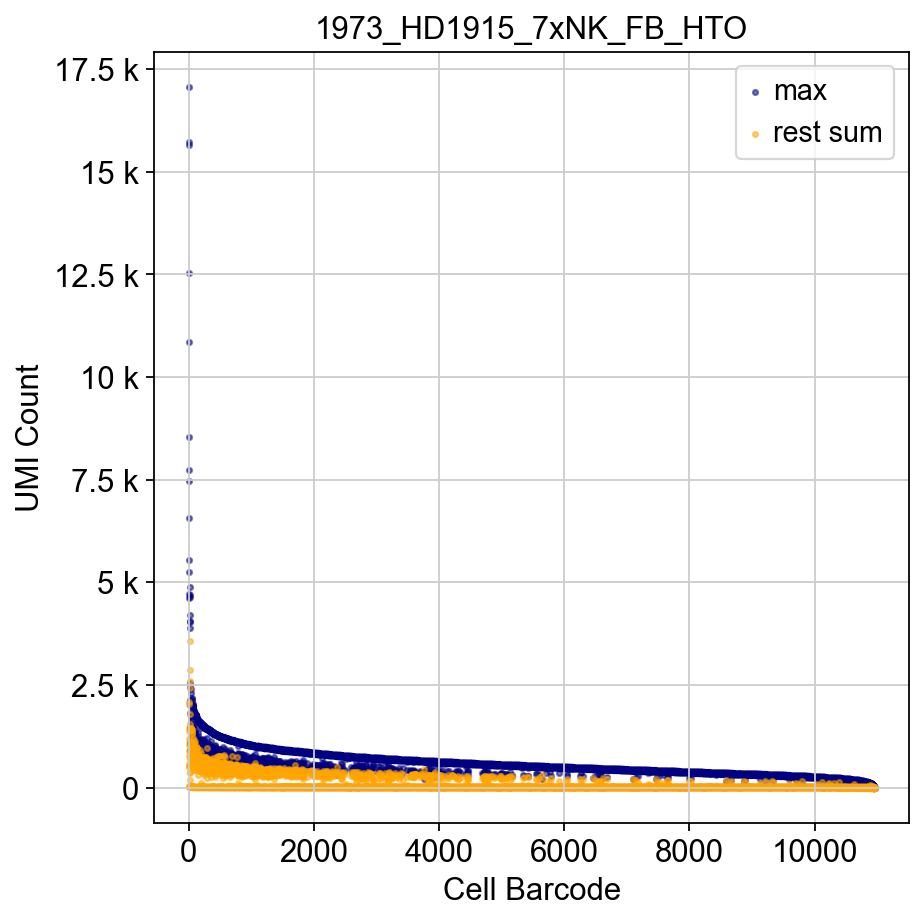

In [78]:
fig, ax = plt.subplots(figsize=(6, 6), facecolor="white")

df_sorted = pd.DataFrame(
    np.vstack(adata_sorted.to_df().apply(
        lambda row: sorted(row, reverse=True), axis=1)
    ),
    index=adata.obs_names
)
dfx = df_sorted.copy()
dfx = dfx.assign(rest=df_sorted.iloc[:, 1:].sum(axis=1))
dfx = dfx.assign(maxx=df_sorted.max(axis=1))

ax.scatter(
    range(len(dfx)),
    dfx.maxx,
    c="navy", s=5, alpha=0.5, label="max"
)
ax.scatter(
    range(len(dfx)), dfx.rest,
    c="orange", s=5, alpha=0.5, label="rest sum"
)
ax.set_xlabel("Cell Barcode")
ax.set_ylabel("UMI Count")
ax.yaxis.set_major_formatter(matplotlib.ticker.EngFormatter())
ax.legend()
ax.set_title(sample_name)

plt.tight_layout()
plt.show()

## UMAP

In [79]:
def clr_normalize_each_cell(adata, inplace=True):
    """Normalize count vector for each cell, i.e. for each row of .X"""

    import numpy as np
    import scipy

    def seurat_clr(x):
        # TODO: support sparseness
        s = np.sum(np.log1p(x[x > 0]))
        exp = np.exp(s / len(x))
        return np.log1p(x / exp)

    if not inplace:
        adata = adata.copy()

    # apply to dense or sparse matrix, along axis. returns dense matrix
    adata.X = np.apply_along_axis(
        seurat_clr, 1, (adata.X.A if scipy.sparse.issparse(adata.X) else adata.X)
    )
    return adata

In [80]:
adata.raw = adata

In [81]:
clr_normalize_each_cell(adata)

AnnData object with n_obs × n_vars = 10957 × 7
    obs: 'unmapped', 'barcode_sequence', 'hash_id', 'unmapped_reads', 'total_reads', 'total_umis'
    var: 'feature_name', 'total_reads'
    layers: 'reads'

In [82]:
sc.pp.log1p(adata)

In [83]:
sc.pp.neighbors(adata)

computing neighbors
    using data matrix X directly
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:09)


In [84]:
sc.tl.leiden(adata, resolution=0.05, random_state=42)

running Leiden clustering
    finished: found 16 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [85]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


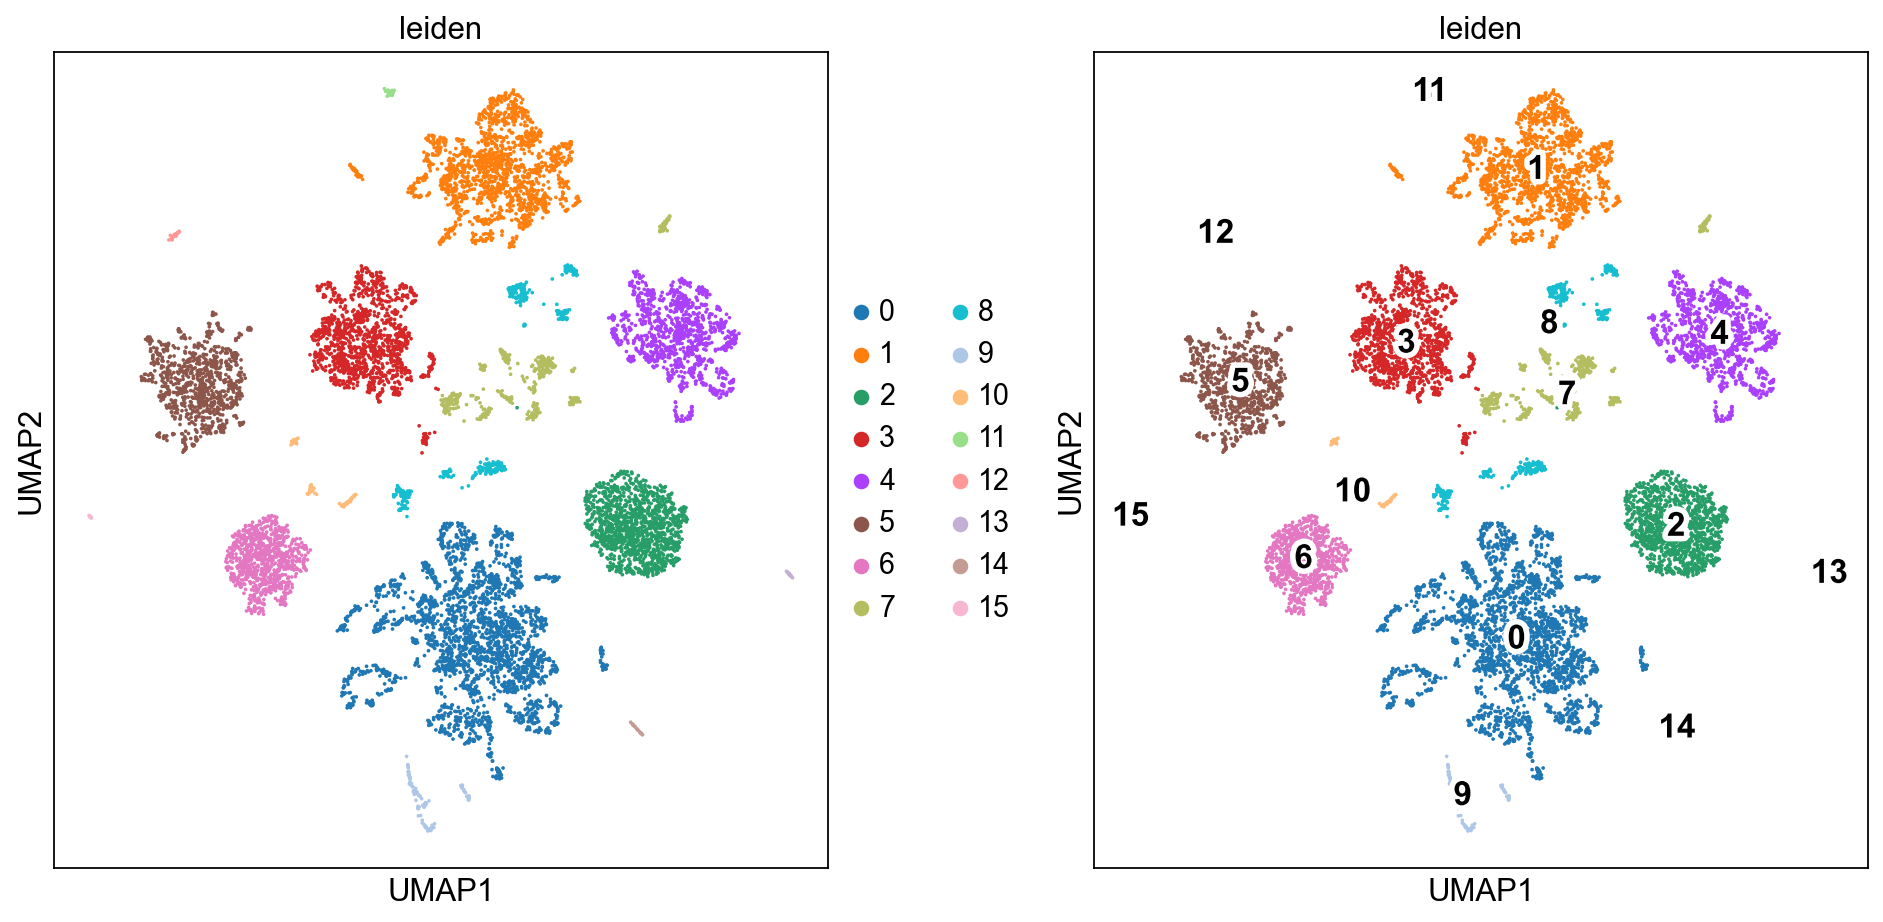

In [86]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sc.pl.umap(
    adata,
    color=["leiden"],
    ax=axs[0], show=False
)

sc.pl.umap(
    adata,
    color=["leiden"],
    legend_loc="on data",
    legend_fontsize=15,
    legend_fontoutline=5,
    ax=axs[1], show=False
)

plt.tight_layout()
plt.show()

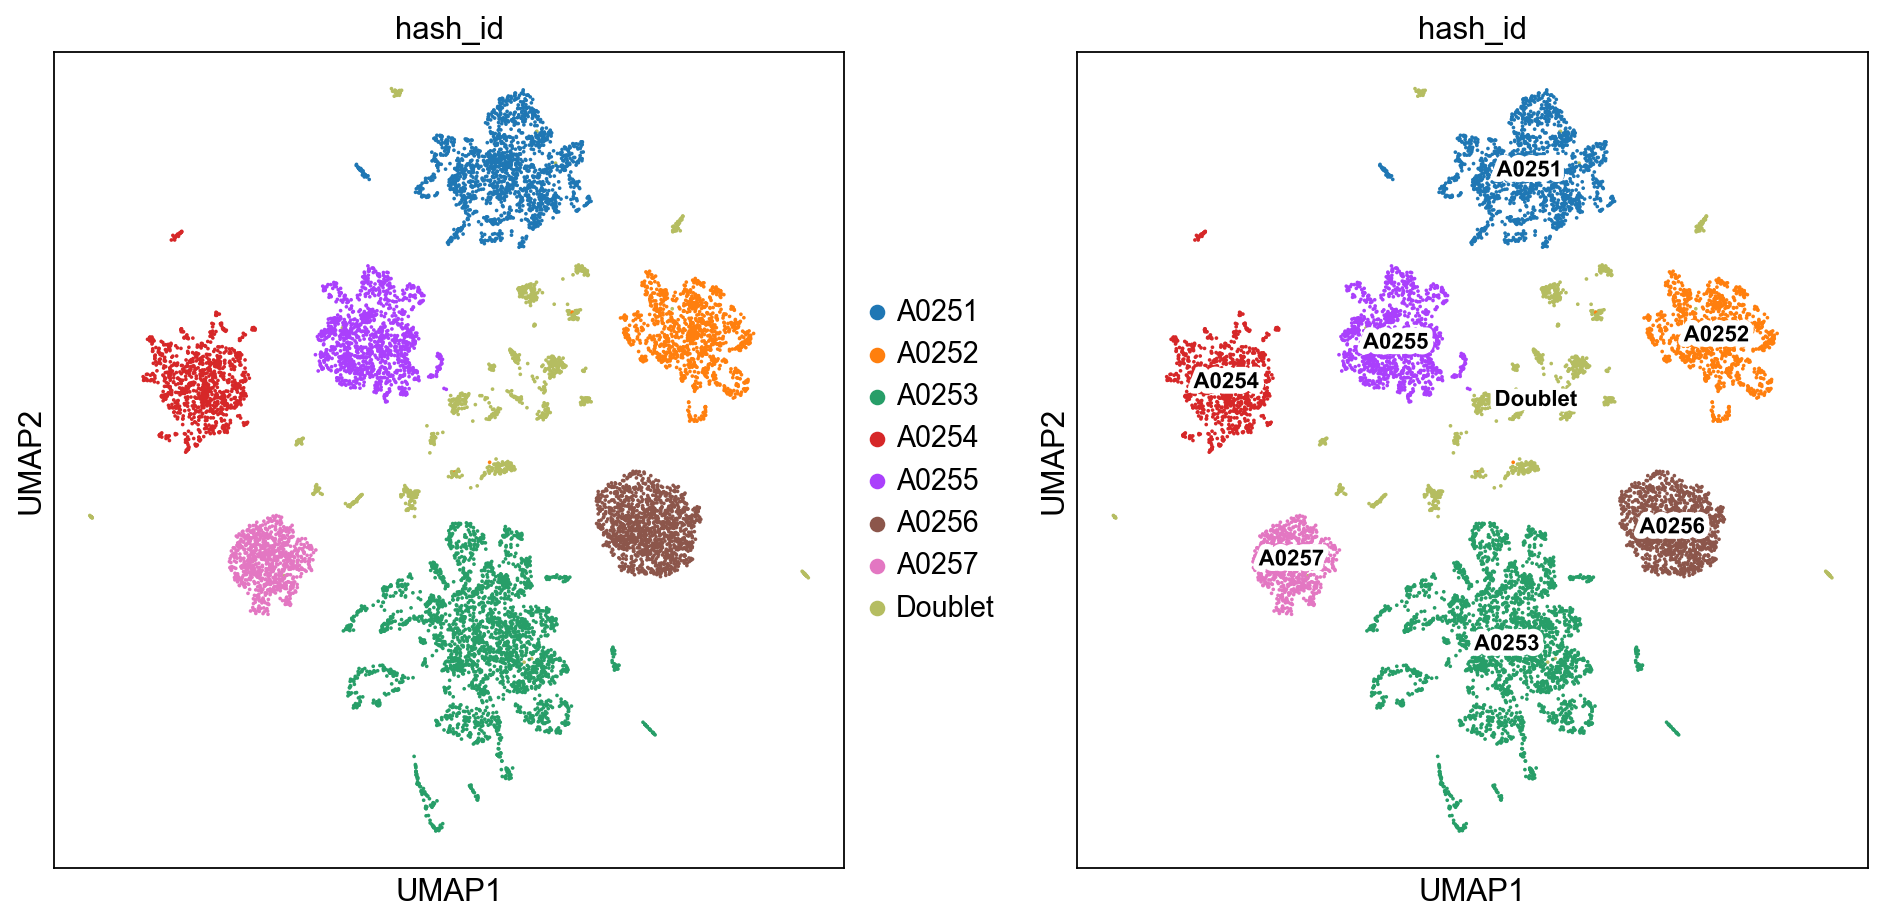

In [87]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sc.pl.umap(
    adata,
    color=["hash_id"],
    ax=axs[0], show=False
)

sc.pl.umap(
    adata,
    color=["hash_id"],
    legend_loc="on data",
    legend_fontsize=10,
    legend_fontoutline=5,
    ax=axs[1], show=False
)

plt.tight_layout()
plt.show()

In [88]:
from matplotlib.colors import ListedColormap

my_cmap1 = ListedColormap(sns.color_palette("Blues").as_hex())
my_cmap2 = sns.color_palette("Paired").as_hex()
my_cmap2[0] = "lightgray"
my_cmap2 = ListedColormap(my_cmap2)

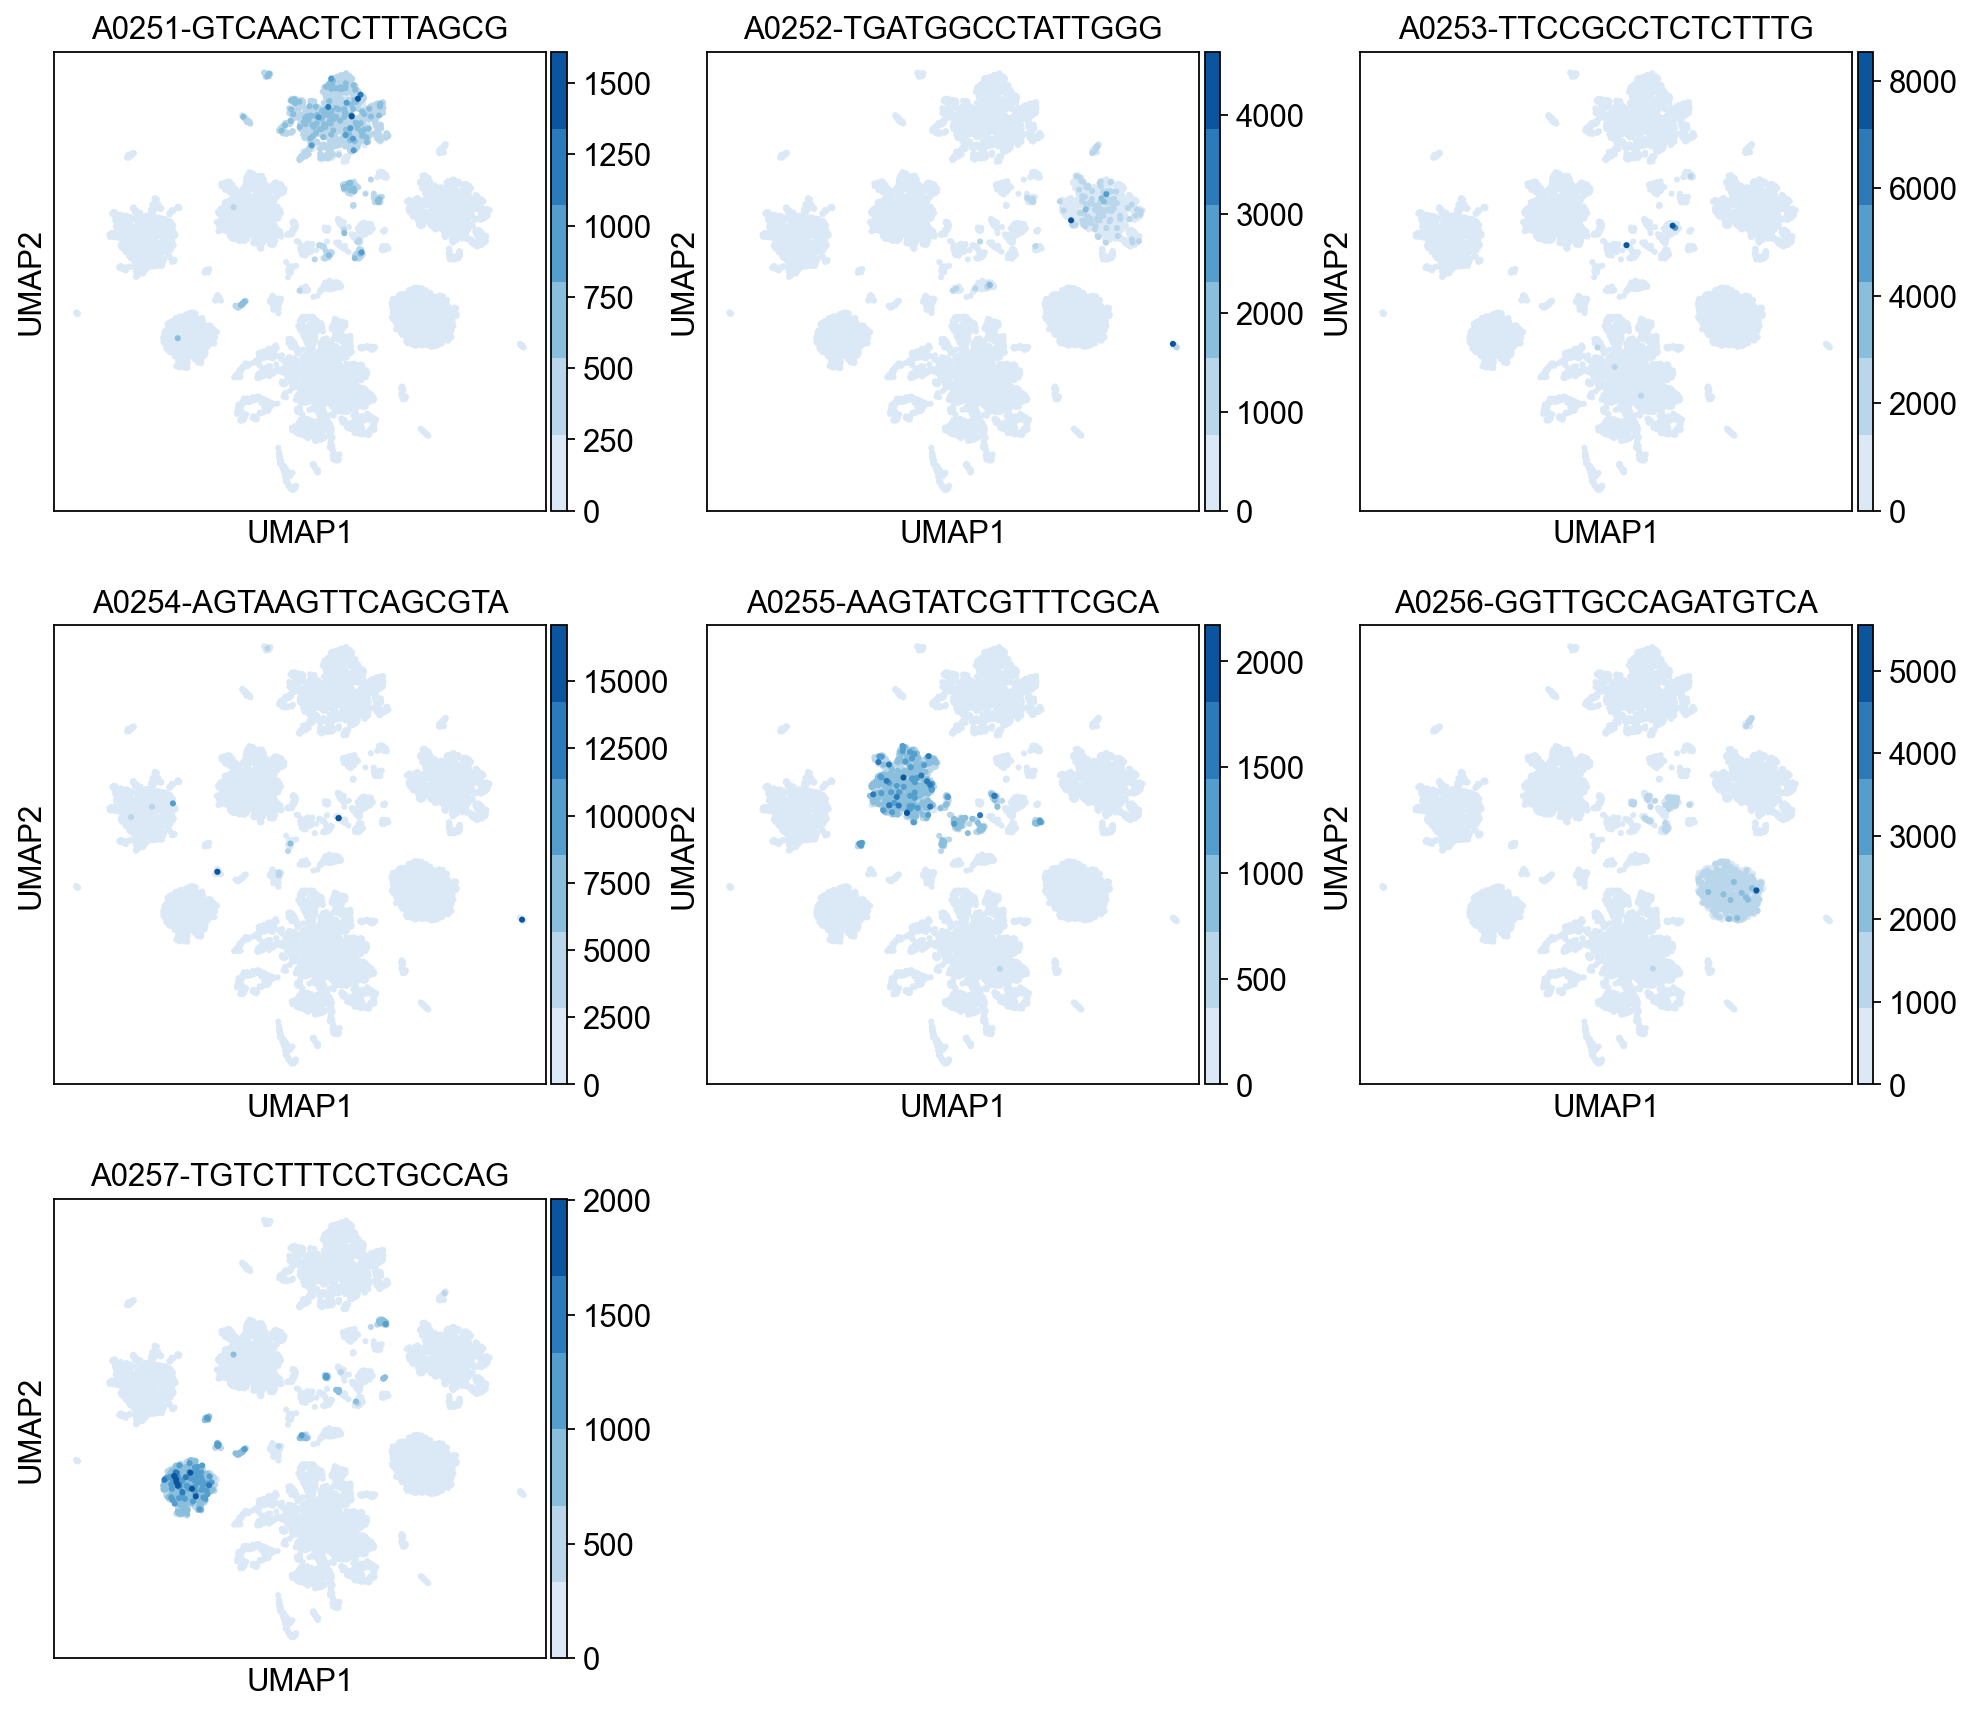

In [89]:
sc.pl.umap(
    adata,
    color=adata.var_names,
    color_map=my_cmap1,
    size=30,
    ncols=3,
)

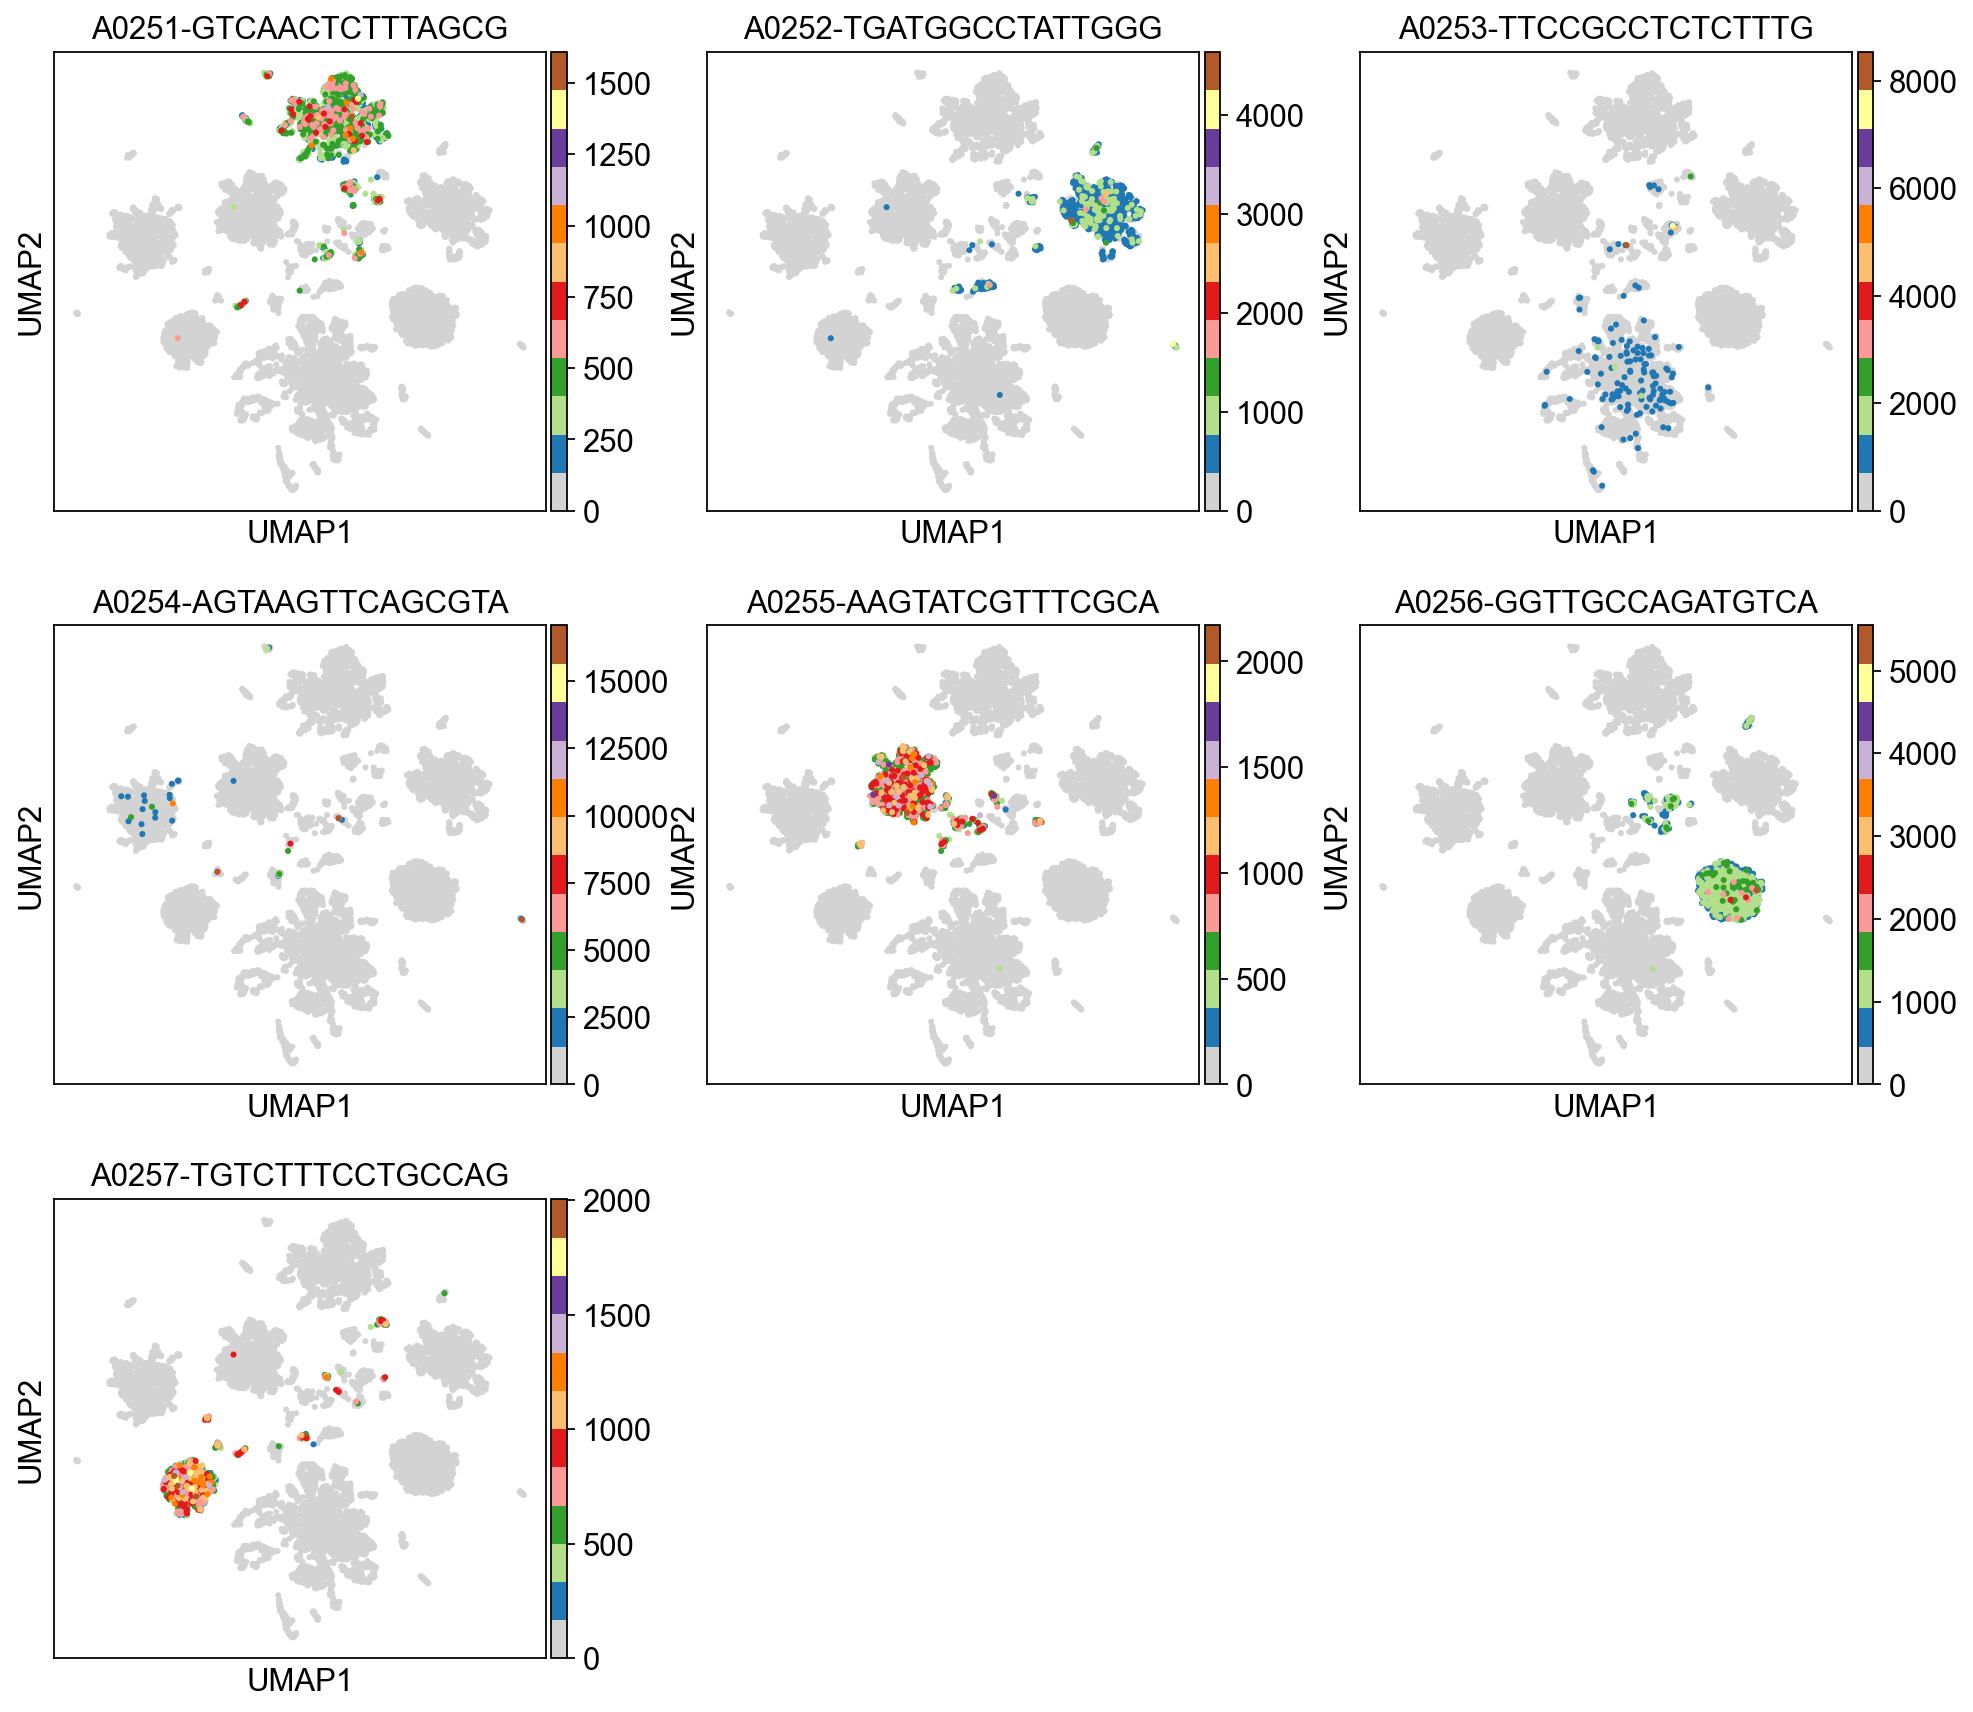

In [90]:
sc.pl.umap(
    adata,
    color=adata.var_names,
    color_map=my_cmap2,
    size=30,
    ncols=3,
)

## Write adata to Disk

In [91]:
adata

AnnData object with n_obs × n_vars = 10957 × 7
    obs: 'unmapped', 'barcode_sequence', 'hash_id', 'unmapped_reads', 'total_reads', 'total_umis', 'leiden'
    var: 'feature_name', 'total_reads'
    uns: 'log1p', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'hash_id_colors'
    obsm: 'X_umap'
    layers: 'reads'
    obsp: 'distances', 'connectivities'

In [92]:
adata.write(os.path.join(path_data, f"{sample_name}.QC.h5ad"))

## Scratch

In [93]:
adata2 = adata.copy()
adata2.X = adata.raw.X